In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import keras
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc, classification_report,accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ParameterGrid
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import export_graphviz
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder
import joblib
from IPython.display import Image  
from sklearn.tree import plot_tree
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_fscore_support
from numpy import mean
#Read the csv, drop index column
df=pd.read_csv("fraud_payment_data.csv")


0.0    1467357
1.0      30819
Name: Label, dtype: int64


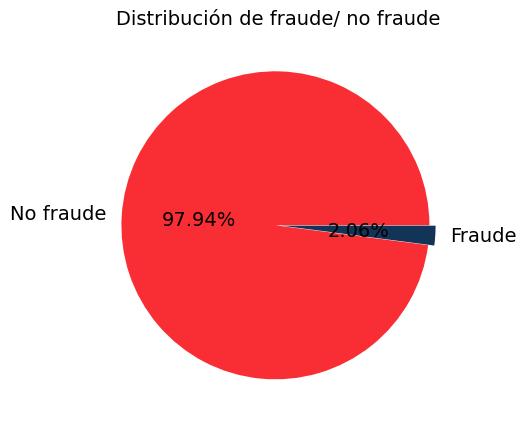

In [2]:
# Distribución de fraude/ no fraude
print(df['Label'].value_counts())

pie, ax = plt.subplots(figsize=[7,5])
labels = ['No fraude', 'Fraude']
colors = ['#f92e35', '#123456']
plt.pie(x = df['Label'].value_counts(), autopct='%.2f%%', explode=[0.02]*2, labels=labels, pctdistance=0.5, textprops={'fontsize': 14}, colors = colors)
plt.title('Distribución de fraude/ no fraude', fontsize=14)
plt.show()

In [3]:

df['Transaction_Type'].value_counts()

MAKE-PAYMENT     557734
QUICK-PAYMENT    217607
MOVE-FUNDS       180205
DEPOSIT-CHECK    109477
DEPOSIT-CASH     109409
EXCHANGE         108167
PAY-CHECK        107851
WITHDRAWAL       107726
Name: Transaction_Type, dtype: int64

In [4]:
#Drop the rows with missing values
print("Number of total rows: ", len(df))

#df = df.dropna()
df = df.dropna(subset=['Label', 'Transaction_Type'])
print("Number of rows after dropping na: ", len(df))
df = df.drop(index=df[df['USD_amount'] == 0].index)
print("Number of rows after dropping USD_amount = 0: ", len(df))

df.info()
df.columns = df.columns.str.replace(' ', '_')

Number of total rows:  1498177
Number of rows after dropping na:  1498176
Number of rows after dropping USD_amount = 0:  1498154
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1498154 entries, 0 to 1498176
Data columns (total 13 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Time_step         1498154 non-null  object 
 1   Transaction_Id    1498154 non-null  object 
 2   Sender_Id         1279268 non-null  object 
 3   Sender_Account    1279268 non-null  object 
 4   Sender_Country    1279269 non-null  object 
 5   Sender_Sector     1279268 non-null  float64
 6   Sender_lob        1279268 non-null  object 
 7   Bene_Id           1282261 non-null  object 
 8   Bene_Account      1282261 non-null  object 
 9   Bene_Country      1282261 non-null  object 
 10  USD_amount        1498154 non-null  float64
 11  Label             1498154 non-null  float64
 12  Transaction_Type  1498154 non-null  object 
dtypes: float64(3), obj

In [5]:
# Agrupar el dataset por Sender_Account y contar el número de transacciones
num_transacciones = df.groupby("Sender_Account")["Transaction_Id"].agg(["count"])

# Renombrar la columna resultante para que se llame "Num_Transacciones"
num_transacciones = num_transacciones.rename(columns={"count": "Num_Transacciones"})
#print num_transacciones
num_transacciones.head()

,Num_Transacciones
Sender_Account,
ACCOUNT-100004,1
ACCOUNT-1000051,1
ACCOUNT-1000193,1
ACCOUNT-1000194,68
ACCOUNT-1000195,58


In [6]:
"""
#Recuento de cuantas CUENTAS tienen transacciones fraudulentas
df_accounts["Label"].value_counts()


pie, ax = plt.subplots(figsize=[7,5])
labels = ['No fraude', 'Fraude']
colors = ['#A92F35', '#1F3456']
plt.pie(x = df_accounts["Label"].value_counts(), autopct='%.2f%%', explode=[0.02]*2, labels=labels, pctdistance=0.5, textprops={'fontsize': 14}, colors = colors)
plt.title('Distrubución de fraude/ no fraude por cuenta', fontsize=14)
plt.show()
"""

'\n#Recuento de cuantas CUENTAS tienen transacciones fraudulentas\ndf_accounts["Label"].value_counts()\n\n\npie, ax = plt.subplots(figsize=[7,5])\nlabels = [\'No fraude\', \'Fraude\']\ncolors = [\'#A92F35\', \'#1F3456\']\nplt.pie(x = df_accounts["Label"].value_counts(), autopct=\'%.2f%%\', explode=[0.02]*2, labels=labels, pctdistance=0.5, textprops={\'fontsize\': 14}, colors = colors)\nplt.title(\'Distrubución de fraude/ no fraude por cuenta\', fontsize=14)\nplt.show()\n'

In [7]:
#Drop first column
#df = df.drop(df.columns[0], axis=1)
#print(df.columns)

categories = df.select_dtypes('O').columns.astype('category')
df[categories]

for i in df.columns:
    print(f'La columna {i} tiene {len(df[i].value_counts())} valores únicos.')

df.describe()

a=(df.Label==1).value_counts()
print(a)

La columna Time_step tiene 639295 valores únicos.
La columna Transaction_Id tiene 1498154 valores únicos.
La columna Sender_Id tiene 59071 valores únicos.
La columna Sender_Account tiene 75161 valores únicos.
La columna Sender_Country tiene 253 valores únicos.
La columna Sender_Sector tiene 50000 valores únicos.
La columna Sender_lob tiene 1 valores únicos.
La columna Bene_Id tiene 279341 valores únicos.
La columna Bene_Account tiene 295015 valores únicos.
La columna Bene_Country tiene 252 valores únicos.
La columna USD_amount tiene 100684 valores únicos.
La columna Label tiene 2 valores únicos.
La columna Transaction_Type tiene 8 valores únicos.
False    1467335
True       30819
Name: Label, dtype: int64


In [8]:
# Crear la nueva columna binaria que determina si Sender_Country es igual a Bene_Country
df['National_Transaction'] = (df['Sender_Country'] == df['Bene_Country']).astype(int)
print('Número de transacciones nacionales:\n', df["National_Transaction"].value_counts())

Número de transacciones nacionales:
 0    1118295
1     379859
Name: National_Transaction, dtype: int64


Central tendency

In [9]:

categories = df.select_dtypes('O').columns.astype('category')
df[categories]


,Time_step,Transaction_Id,Sender_Id,Sender_Account,Sender_Country,Sender_lob,Bene_Id,Bene_Account,Bene_Country,Transaction_Type
0,2022-03-15 10:24:00,EXCHANGE-10115,JPMC-CLIENT-10098,ACCOUNT-10108,USA,CCB,NaN,NaN,NaN,WITHDRAWAL
1,2022-03-15 10:24:00,QUICK-PAYMENT-10116,JPMC-CLIENT-10098,ACCOUNT-10109,USA,CCB,CLIENT-10100,ACCOUNT-10106,CANADA,QUICK-PAYMENT
2,2022-03-15 10:24:00,DEPOSIT-CASH-9833,NaN,NaN,NaN,NaN,JPMC-CLIENT-9812,ACCOUNT-9826,USA,DEPOSIT-CASH
3,2022-03-15 10:24:00,PAY-CHECK-9832,JPMC-CLIENT-9812,ACCOUNT-9825,USA,CCB,JPMC-CLIENT-9814,ACCOUNT-9824,USA,PAY-CHECK
4,2022-03-15 10:24:00,DEPOSIT-CHECK-9806,NaN,NaN,NaN,NaN,JPMC-CLIENT-9789,ACCOUNT-9800,USA,DEPOSIT-CHECK
...,...,...,...,...,...,...,...,...,...,...
1498172,2054-09-14 13:17:24,PAY-BILL-2180018,JPMC-CLIENT-2179746,ACCOUNT-2179757,USA,CCB,BILL-COMPANY-2179895,ACCOUNT-2179896,USA,MAKE-PAYMENT
1498173,2054-09-15 00:57:24,QUICK-PAYMENT-2181421,JPMC-CLIENT-2181147,ACCOUNT-2181158,USA,CCB,CLIENT-2181279,ACCOUNT-2181280,USA,QUICK-PAYMENT
1498174,2054-09-15 01:17:24,PAYMENT-2180021,JPMC-CLIENT-2179746,ACCOUNT-2179757,USA,CCB,BILL-COMPANY-2180022,ACCOUNT-2180023,USA,MAKE-PAYMENT
1498175,2054-09-15 12:57:24,QUICK-PAYMENT-2181422,JPMC-CLIENT-2181147,ACCOUNT-2181158,USA,CCB,CLIENT-2181279,ACCOUNT-2181280,USA,QUICK-PAYMENT


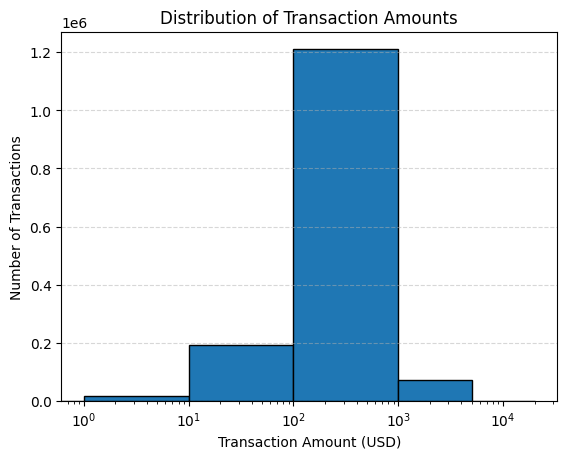

In [10]:

# Define the bin edges
bins = [0,1,10, 100, 1000, 5000,20000]

# Plot the histogram
plt.hist(df['USD_amount'], bins=bins, align='mid',edgecolor='black')
# Set the x-axis scale to 'log'
plt.xscale('log')
# Set the axis labels and title

plt.xlabel('Transaction Amount (USD)')
plt.ylabel('Number of Transactions')
plt.title('Distribution of Transaction Amounts')
plt.grid(axis='y', alpha=0.5, linestyle='--')


plt.show()


Distribution by countries

In [11]:
# Statistics of top 10 Sender_Country
df['Sender_Country'].value_counts().head(10)
#All values that is not 


USA              997216
GERMANY           73431
CANADA            27383
LIECHTENSTEIN      1163
THAILAND           1157
FRENCH-GUIANA      1148
KUWAIT             1134
MAURITANIA         1116
JAMAICA            1067
GEORGIA            1027
Name: Sender_Country, dtype: int64

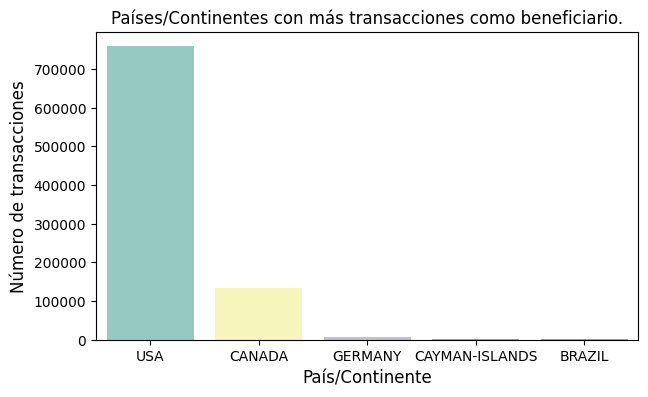

In [12]:
#First we get all the countries with fraudulant transactions
countries_ben = df['Bene_Country'].value_counts().head(5)
#Then we create a bar chart
plt.figure(figsize=(7,4))
sns.barplot(x=countries_ben.index, y=countries_ben.values, palette='Set3')
plt.title('Países/Continentes con más transacciones como beneficiario.')
plt.ylabel('Número de transacciones', fontsize=12)
plt.xlabel('País/Continente', fontsize=12)
plt.show()

In [13]:
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2

def pais_a_continente(pais):
    try:
        # Casos especiales
        if pais == "USA":
            return "USA"
        if pais == "GERMANY":
            return "GERMANY"
        if pais == "CANADA":
            return "CANADA"
        
        # Removiendo guiones y convirtiendo a nombre normal
        pais = pais.replace('-', ' ').title()
        cn_a2_code = country_name_to_country_alpha2(pais)
        cn_continent = country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'Desconocido'  # si el país no está en el paquete pycountry-convert
    return cn_continent

df['Sender_Country'] = df['Sender_Country'].apply(pais_a_continente)


df['Sender_Country'].value_counts().head(30)


USA            997216
Desconocido    244695
GERMANY         73431
AS              37931
AF              37358
EU              32478
CANADA          27383
NA              20836
OC              15048
SA              10833
AN                945
Name: Sender_Country, dtype: int64

In [14]:
#Statistics only the fraud transactions
fraud=df[df['Label']==1]
fraud['Sender_Country'].value_counts().head(10)

USA            21242
Desconocido     4770
CANADA           949
AF               944
AS               933
EU               793
NA               462
OC               393
SA               273
GERMANY           49
Name: Sender_Country, dtype: int64

In [15]:
#Statistics of top 10 Bene_Country
df['Bene_Country'].value_counts().head(200)
#show all values  of Bene_Country


USA               757897
CANADA            134434
GERMANY             7957
CAYMAN-ISLANDS      1964
BRAZIL              1908
                   ...  
SAMOA               1395
CHILE               1395
TIMOR-LESTE         1392
UGANDA              1382
GRENADA             1381
Name: Bene_Country, Length: 200, dtype: int64

In [16]:
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2

def pais_a_continente(pais):
    try:
        # Casos especiales
        if pais == "USA":
            return "USA"
        if pais == "GERMANY":
            return "GERMANY"
        if pais == "CANADA":
            return "CANADA"
        
        # Removiendo guiones y convirtiendo a nombre normal
        pais = pais.replace('-', ' ').title()
        cn_a2_code = country_name_to_country_alpha2(pais)
        cn_continent = country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'Desconocido'  # si el país no está en el paquete pycountry-convert
    return cn_continent

df['Bene_Country'] = df['Bene_Country'].apply(pais_a_continente)


df['Bene_Country'].value_counts().head(30)

USA            757897
Desconocido    271548
CANADA         134434
AS              79343
AF              77138
EU              67810
NA              44657
OC              32780
SA              22829
GERMANY          7957
AN               1761
Name: Bene_Country, dtype: int64

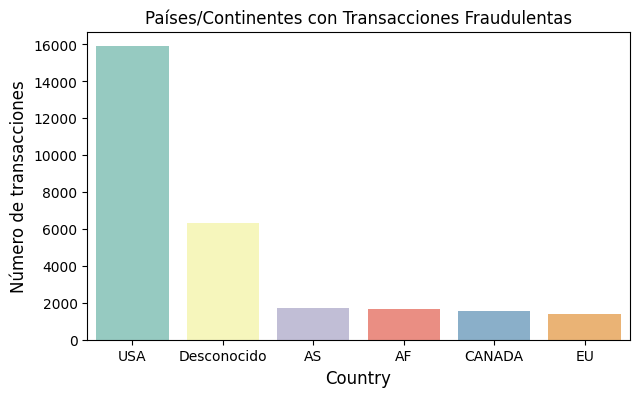

In [17]:

#in this cell we are going to create a bar chart showing the 15 top countries with the most fraudulant transactions
#First we get all the countries with fraudulant transactions
fraud_countries = df[df['Label'] == 1]['Bene_Country'].value_counts().head(6)
#Then we create a bar chart
plt.figure(figsize=(7,4))
sns.barplot(x=fraud_countries.index, y=fraud_countries.values, palette='Set3')
plt.title('Países/Continentes con Transacciones Fraudulentas')
plt.ylabel('Número de transacciones', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.show()

In [18]:
#make a dictionary with each column and its type
dtypes = dict(df.dtypes)
print(dtypes)


{'Time_step': dtype('O'), 'Transaction_Id': dtype('O'), 'Sender_Id': dtype('O'), 'Sender_Account': dtype('O'), 'Sender_Country': dtype('O'), 'Sender_Sector': dtype('float64'), 'Sender_lob': dtype('O'), 'Bene_Id': dtype('O'), 'Bene_Account': dtype('O'), 'Bene_Country': dtype('O'), 'USD_amount': dtype('float64'), 'Label': dtype('float64'), 'Transaction_Type': dtype('O'), 'National_Transaction': dtype('int32')}


In [19]:
#count all the rows which have missing value Null OR NaN in all of these columns: Sender_Id,Sender_Account,Sender_Country,Sender_Sector,Sender_lob
null_count = df['Sender_Id'].isnull().sum() 
print(null_count)

218886


In [20]:
"""
# Crear la nueva columna binaria Sender_ClienteJP, determina si el sender es un cliente del banco.
df['Bene_ClienteJP'] = df['Bene_Id'].apply(lambda x: 1 if x[:4] == 'JPMC' else 0)
print('Número de transacciones recibidas por clientes del banco (1 cliente):\n',df["Bene_ClienteJP"].value_counts())


#Crear la nueva columna binaria que determina si Sender_Country es igual a Bene_Country
df['National_Transaction'] = (df['Sender_Country'] == df['Bene_Country']).astype(int)
print('Número de transacciones nacionales:\n',df["National_Transaction"].value_counts())
"""
# Crear la nueva columna binaria Bene_ClienteJP, determina si el sender es un cliente del banco.
df['Bene_ClienteJP'] = df['Bene_Id'].apply(lambda x: 1 if isinstance(x, str) and x[:4] == 'JPMC' else 0)
print('Número de transacciones recibidas por clientes del banco (1 cliente):\n', df["Bene_ClienteJP"].value_counts())
# Crear la nueva columna binaria Sender_ClienteJP, determina si el sender es un cliente del banco.
df['Sen_ClienteJP'] = df['Sender_Id'].apply(lambda x: 1 if isinstance(x, str) and x[:4] == 'JPMC' else 0)
print('Número de transacciones enviadas por clientes del banco (1 cliente):\n', df["Sen_ClienteJP"].value_counts())



Número de transacciones recibidas por clientes del banco (1 cliente):
 0    948562
1    549592
Name: Bene_ClienteJP, dtype: int64
Número de transacciones enviadas por clientes del banco (1 cliente):
 1    1089052
0     409102
Name: Sen_ClienteJP, dtype: int64


In [21]:
df['Transaction_Type'].value_counts()

MAKE-PAYMENT     557712
QUICK-PAYMENT    217607
MOVE-FUNDS       180205
DEPOSIT-CHECK    109477
DEPOSIT-CASH     109409
EXCHANGE         108167
PAY-CHECK        107851
WITHDRAWAL       107726
Name: Transaction_Type, dtype: int64

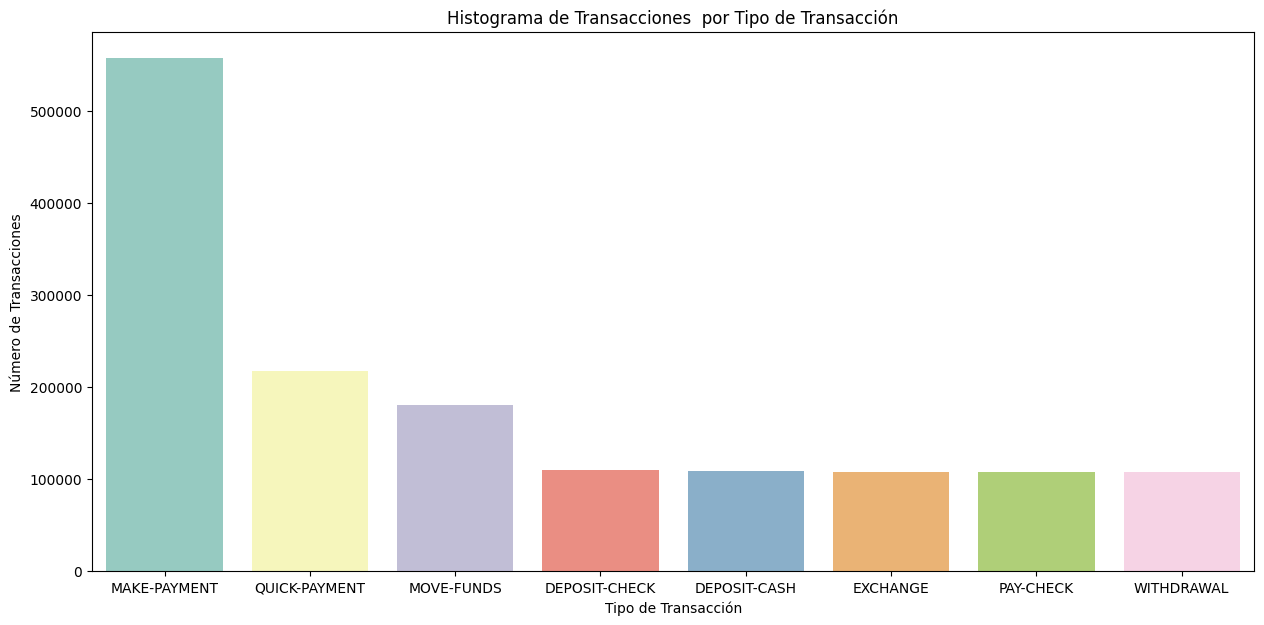

In [22]:


# Crear un histograma de los valores de Transaction_Type 

Trans_Type = df['Transaction_Type'].value_counts()
#Then we create a bar chart
plt.figure(figsize=(15,7))
sns.barplot(x=Trans_Type.index, y=Trans_Type.values, palette='Set3')
plt.xlabel('Tipo de Transacción')
plt.ylabel('Número de Transacciones')
plt.title('Histograma de Transacciones  por Tipo de Transacción')
plt.show()

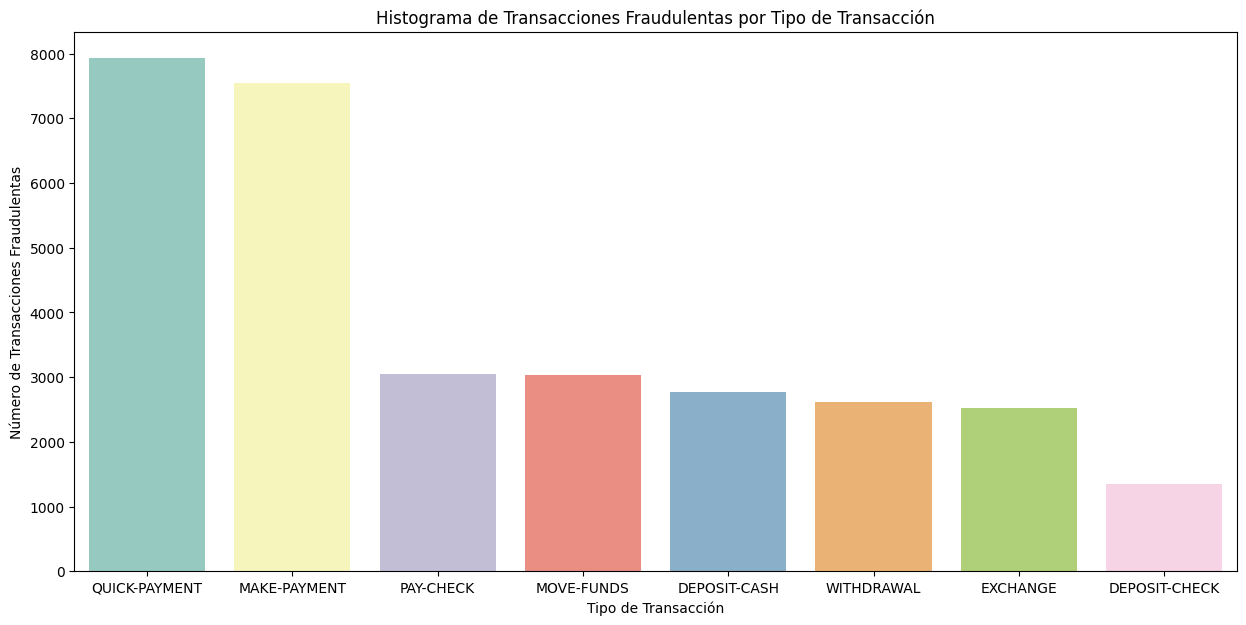

In [23]:
Trans_Type_fraud = df[df['Label'] == 1]['Transaction_Type'].value_counts()
#Then we create a bar chart
plt.figure(figsize=(15,7))
sns.barplot(x=Trans_Type_fraud.index, y=Trans_Type_fraud.values, palette='Set3')
plt.xlabel('Tipo de Transacción')
plt.ylabel('Número de Transacciones Fraudulentas')
plt.title('Histograma de Transacciones Fraudulentas por Tipo de Transacción')
plt.show()

In [24]:
#proporcion porcentual de las transacciones con valor en Transaction_Type que son fraude
print(df['Transaction_Type'].value_counts(normalize=True) * 100)
fraud_df=df[df["Label"]==1]

MAKE-PAYMENT     37.226614
QUICK-PAYMENT    14.525009
MOVE-FUNDS       12.028470
DEPOSIT-CHECK     7.307460
DEPOSIT-CASH      7.302921
EXCHANGE          7.220019
PAY-CHECK         7.198926
WITHDRAWAL        7.190583
Name: Transaction_Type, dtype: float64


In [25]:
#proporcion porcentual de las transacciones con valor en Transaction_Type que son fraude
fraud_df["Transaction_Type"].value_counts(normalize=True) * 100

QUICK-PAYMENT    25.747104
MAKE-PAYMENT     24.475161
PAY-CHECK         9.880269
MOVE-FUNDS        9.860800
DEPOSIT-CASH      8.994451
WITHDRAWAL        8.468802
EXCHANGE          8.196243
DEPOSIT-CHECK     4.377170
Name: Transaction_Type, dtype: float64

In [26]:
"""
# Crear la nueva columna 'Sender_Company' y asignarle 1 si el valor de 'Sender_Id' contiene "COMPANY"
# y 0 en caso contrario
df["Sender_Company"] = df["Sender_Id"].str.contains("COMPANY").astype(int)
#Cuenta cuantos valores = 1 hay en la columna Sender_Company
df["Sender_Company"].value_counts()
#Si la columna Sender_lob contiene el valor "CCB" asignarle 1 y 0 en caso contrario
df["Sender_lob"] = df["Sender_lob"].str.contains("CCB").astype(int)
"""
###############FOR NAN VALUES#################
# Crear la nueva columna 'Sender_Company' y asignarle 1 si el valor de 'Sender_Id' contiene "COMPANY"
# y 0 en caso contrario
df["Sender_Company"] = df["Sender_Id"].apply(lambda x: 1 if isinstance(x, str) and "COMPANY" in x else 0)

# Cuenta cuantos valores = 1 hay en la columna Sender_Company
print(df["Sender_Company"].value_counts())

# Si la columna Sender_lob contiene el valor "CCB" asignarle 1 y 0 en caso contrario
df["Sender_lob"] = df["Sender_lob"].apply(lambda x: 1 if isinstance(x, str) and "CCB" in x else 0)
print


0    1393532
1     104622
Name: Sender_Company, dtype: int64


<function print>

In [27]:
print(df["Sender_lob"].value_counts())

1    1279268
0     218886
Name: Sender_lob, dtype: int64


In [28]:
"""
#  Crear la nueva columna 'JPMC_Transaction' y asignarle 1 si el valor de 'Sender_Id'y de "Bene_Id" contienen ambas "JPMC"
# y 0 en caso contrario 
df["JPMC_Transaction"] = (df["Sender_Id"].str.contains("JPMC") & df["Bene_Id"].str.contains("JPMC")).astype(int)
#Cuenta cuantos valores = 1 hay en la columna Comp_to_Comp
df["JPMC_Transaction"].value_counts()
"""
#############NAN VALUES########
# Crear la nueva columna 'JPMC_Transaction' y asignarle 1 si el valor de 'Sender_Id'y de "Bene_Id" contienen ambas "JPMC"
# y 0 en caso contrario 
df["JPMC_Transaction"] = (df["Sender_Id"].str.contains("JPMC") & df["Bene_Id"].str.contains("JPMC")).astype(int)
#Cuenta cuantos valores = 1 hay en la columna Comp_to_Comp
df["JPMC_Transaction"].value_counts()


0    1357664
1     140490
Name: JPMC_Transaction, dtype: int64

C:\Users\docam\AppData\Local\Temp\ipykernel_4284\1639157614.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Sender_Id"] = df["Sender_Id"].str.replace("(COMPANY|CLIENT).*", "\\1")


JPMC-CLIENT     1064039
CLIENT           110607
COMPANY           59204
JPMC-COMPANY      25013
BILL-COMPANY      20405
Name: Sender_Id, dtype: int64


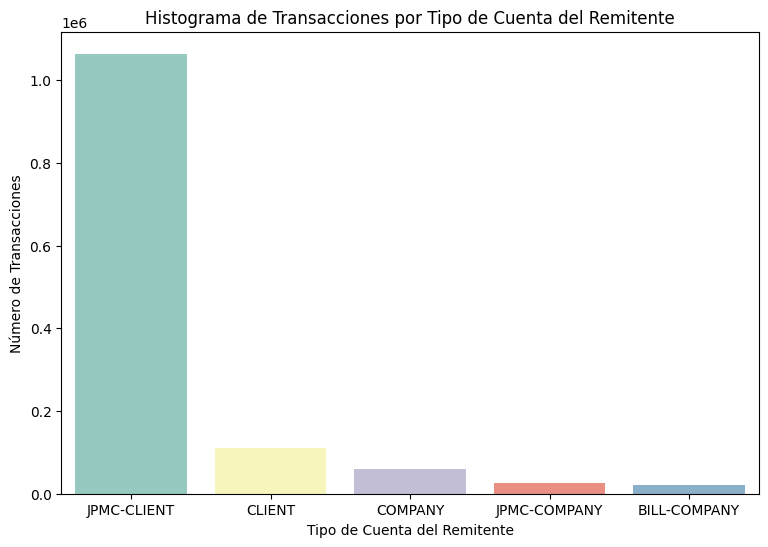

In [29]:
"""
# Eliminar los caracteres después de "COMPANY" o "CLIENT" en la columna "Sender_Id"
df["Sender_Id"] = df["Sender_Id"].str.replace("(COMPANY|CLIENT).*", "\\1")
#Cuenta cuantos valores hay en la columna Sender_Id
df["Sender_Id"].value_counts()
#Haz un histograma con los valores de la columna Sender_Id
plt.hist(df['Sender_Id'],edgecolor='black' )
plt.xlabel('Tipo de Cuenta del Remitente')
plt.ylabel('Número de Transacciones')
plt.title('Histograma de Transacciones  por Tipo de Cuenta del Remitente')
"""
############NAN Values###############
import matplotlib.pyplot as plt

# Eliminar los caracteres después de "COMPANY" o "CLIENT" en la columna "Sender_Id"
df["Sender_Id"] = df["Sender_Id"].str.replace("(COMPANY|CLIENT).*", "\\1")

# Cuenta cuantos valores hay en la columna Sender_Id
print(df["Sender_Id"].value_counts())

# Filtrar los datos que no son None o NaN
filtered_data = df['Sender_Id'].dropna()

# Haz un histograma con los valores de la columna Sender_Id (sin None o NaN)
plt.figure(figsize=(9,6))
sns.barplot(x=filtered_data.value_counts().index, y=filtered_data.value_counts().values, palette='Set3')

plt.xlabel('Tipo de Cuenta del Remitente')
plt.ylabel('Número de Transacciones')
plt.title('Histograma de Transacciones por Tipo de Cuenta del Remitente')
plt.show()



In [30]:
#proporcion porcentual de las transacciones con valor en Transaction_Type que son fraude
print(df['Sender_Id'].value_counts(normalize=True) * 100)


JPMC-CLIENT     83.175613
CLIENT           8.646116
COMPANY          4.627959
JPMC-COMPANY     1.955259
BILL-COMPANY     1.595053
Name: Sender_Id, dtype: float64


In [31]:
fraud_df=df[df["Label"]==1]
print(fraud_df['Sender_Id'].value_counts(normalize=True) * 100)

JPMC-CLIENT     82.448123
CLIENT          13.768822
BILL-COMPANY     2.318526
COMPANY          1.011312
JPMC-COMPANY     0.453217
Name: Sender_Id, dtype: float64


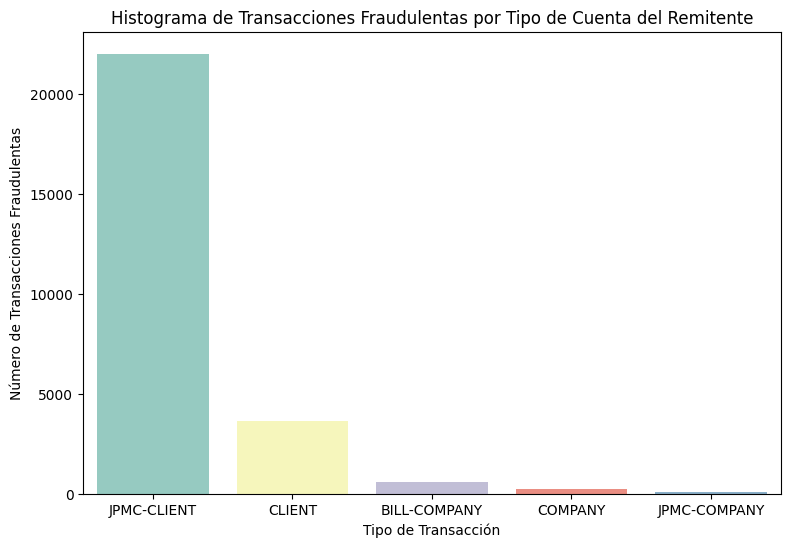

In [32]:
Sender_fraud = df[df['Label'] == 1]['Sender_Id'].value_counts()
#Then we create a bar chart
plt.figure(figsize=(9,6))
sns.barplot(x=Sender_fraud.index, y=Sender_fraud.values, palette='Set3')
plt.xlabel('Tipo de Transacción')
plt.ylabel('Número de Transacciones Fraudulentas')
plt.title('Histograma de Transacciones Fraudulentas por Tipo de Cuenta del Remitente')
plt.show()

C:\Users\docam\AppData\Local\Temp\ipykernel_4284\2069260327.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Bene_Id"] = df["Bene_Id"].str.replace("(COMPANY|CLIENT).*", "\\1")


JPMC-CLIENT     522547
BILL-COMPANY    362143
CLIENT          307042
COMPANY          63484
JPMC-COMPANY     27045
Name: Bene_Id, dtype: int64


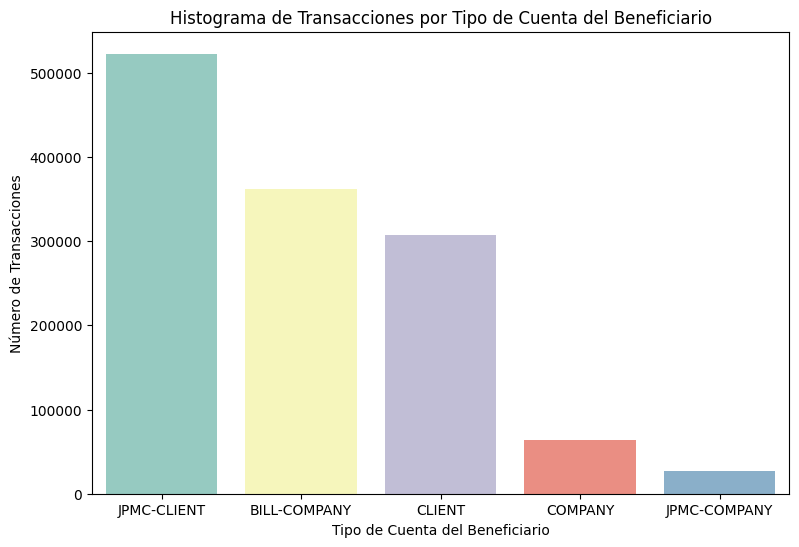

In [33]:
"""
# Eliminar los caracteres después de "COMPANY" o "CLIENT" en la columna "Sender_Id"
df["Bene_Id"] = df["Bene_Id"].str.replace("(COMPANY|CLIENT).*", "\\1")
#Cuenta cuantos valores hay en la columna Sender_Id
df["Bene_Id"].value_counts()
#Haz un histograma con los valores de la columna Sender_Id
plt.hist(df['Bene_Id'],edgecolor='black' )
plt.xlabel('Tipo de Cuenta del Beneficiario')
plt.ylabel('Número de Transacciones')
plt.title('Histograma de Transacciones  por Tipo de Cuenta del Beneficiario')
"""
###############NAN VALUES###############


# Eliminar los caracteres después de "COMPANY" o "CLIENT" en la columna "Bene_Id"
df["Bene_Id"] = df["Bene_Id"].str.replace("(COMPANY|CLIENT).*", "\\1")

# Cuenta cuantos valores hay en la columna Bene_Id
print(df["Bene_Id"].value_counts())

# Filtrar los datos que no son None o NaN
filtered_data = df.query('Bene_Id != "MAKE-PAYMENT"')['Bene_Id'].dropna()


# Haz un histograma con los valores de la columna Sender_Id (sin None o NaN)
plt.figure(figsize=(9,6))
sns.barplot(x=filtered_data.value_counts().index, y=filtered_data.value_counts().values, palette='Set3')

# Haz un histograma con los valores de la columna Bene_Id (sin None o NaN)

plt.xlabel('Tipo de Cuenta del Beneficiario')
plt.ylabel('Número de Transacciones')
plt.title('Histograma de Transacciones por Tipo de Cuenta del Beneficiario')
plt.show()



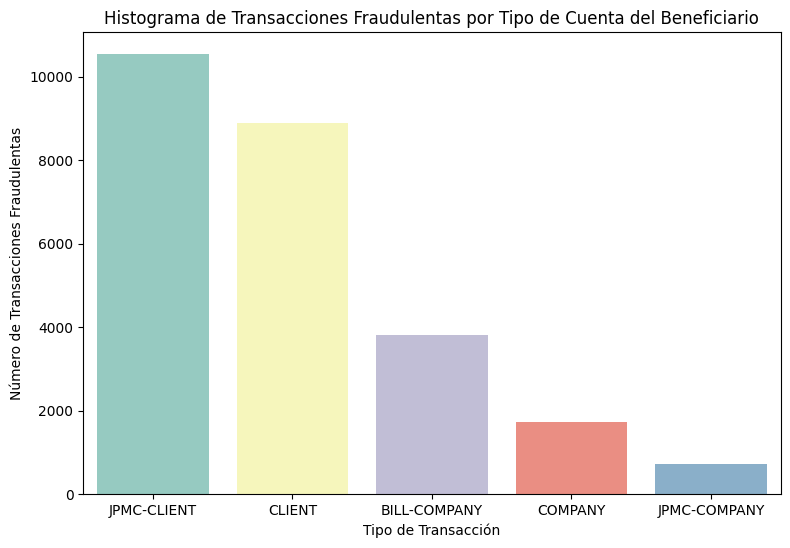

In [34]:
Bene_fraud = df[df['Label'] == 1]['Bene_Id'].value_counts()
#Then we create a bar chart
plt.figure(figsize=(9,6))
sns.barplot(x=Bene_fraud.index, y=Bene_fraud.values, palette='Set3')
plt.xlabel('Tipo de Transacción')
plt.ylabel('Número de Transacciones Fraudulentas')
plt.title('Histograma de Transacciones Fraudulentas por Tipo de Cuenta del Beneficiario')
plt.show()

In [35]:
df['Time_step'] = pd.to_datetime(df['Time_step']) # Convertir a datetime 

# Agrupar por Sender_Account
df_grouped = df.groupby('Sender_Account')

# Calcular la diferencia de tiempo en segundos
df['Time_Diff_Last_Trans_Sen'] = (df['Time_step'] - df_grouped['Time_step'].shift()).dt.total_seconds().fillna(0)



In [36]:
#create a df called df_num
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.drop(["Sender_Sector","Bene_ClienteJP","Sen_ClienteJP", "Sender_lob"],axis=1,inplace=True)
df_num.head()


C:\Users\docam\AppData\Roaming\Python\Python39\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,USD_amount,Label,Sender_Company,Time_Diff_Last_Trans_Sen
0,558.43,0.0,0,0.0
1,622.78,0.0,0,0.0
2,802.54,0.0,0,0.0
3,989.09,0.0,0,0.0
4,786.78,0.0,0,0.0


In [37]:
#get statistics of Time_Diff_Last_Trans_Sen
df["Time_Diff_Last_Trans_Sen"].describe()



count    1.498154e+06
mean     1.014247e+05
std      1.761696e+05
min      0.000000e+00
25%      6.000000e+02
50%      4.320000e+04
75%      1.302000e+05
max      4.843800e+06
Name: Time_Diff_Last_Trans_Sen, dtype: float64

In [38]:
# Sort the data by 'Sender_Account' and 'Time_step'
df.sort_values(by=['Sender_Account', 'Time_step'], inplace=True)

# Define a function to compute the running average excluding the first transaction
def running_average(series):
    return series.shift().expanding().mean().fillna(0)

# Apply the function to each group
df['Average_Diff_Time_Sent'] = df.groupby('Sender_Account')['Time_Diff_Last_Trans_Sen'].apply(running_average)
df['Average_Diff_Time_Sent'] = df['Average_Diff_Time_Sent'].round(2)
df.reset_index(drop=True, inplace=True)


In [39]:
df_num.merge(df[['Average_Diff_Time_Sent']], left_index=True, right_index=True, how='left')
df_num.head()


,USD_amount,Label,Sender_Company,Time_Diff_Last_Trans_Sen
0,558.43,0.0,0,0.0
1,622.78,0.0,0,0.0
2,802.54,0.0,0,0.0
3,989.09,0.0,0,0.0
4,786.78,0.0,0,0.0


In [40]:
df['Average_Diff_Time_Sent'].describe()
df_num['Average_Diff_Time_Sent'] = df['Average_Diff_Time_Sent']

C:\Users\docam\AppData\Local\Temp\ipykernel_4284\3147417148.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['Average_Diff_Time_Sent'] = df['Average_Diff_Time_Sent']


C:\Users\docam\AppData\Local\Temp\ipykernel_4284\3822189203.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num["Time_Diff_Last_Trans_Sen"]=df["Time_Diff_Last_Trans_Sen"]


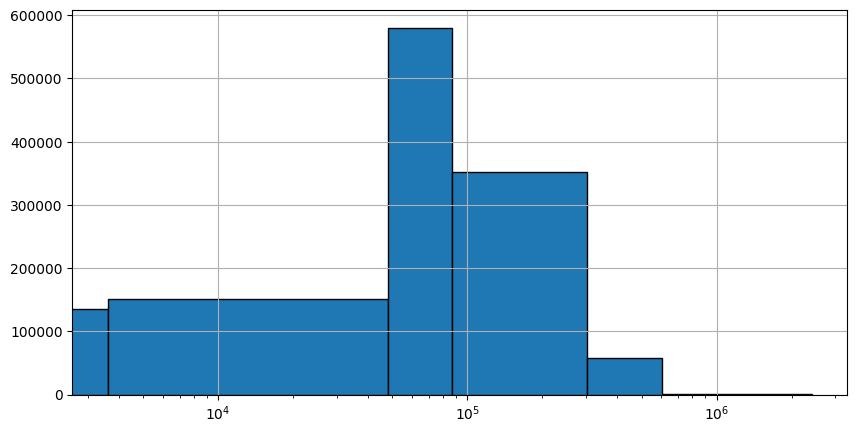

In [41]:
bins=[-0.1,3600,48000,86400,300800,601600,2419200]
labels = ["1 hour","12h" ,"24h", '1 week', '1 month', 'more 1 month']
plt.xscale("log")
df['Average_Diff_Time_Sent'].hist(bins=bins, figsize=(10,5),edgecolor="black")
df['Average_Diff_Time_Sent'] = pd.cut(df['Average_Diff_Time_Sent'], bins=bins, labels=labels, right=False)
df['Average_Diff_Time_Sent'].value_counts()
df_num["Time_Diff_Last_Trans_Sen"]=df["Time_Diff_Last_Trans_Sen"]

0.1         0.0
0.2       600.0
0.3       600.0
0.4     43200.0
0.5     43200.0
0.6     44400.0
0.7     87600.0
0.8    173400.0
0.9    304800.0
Name: Time_Diff_Last_Trans_Sen, dtype: float64
1DIA      314581
12H       304427
CERO      296237
POCO      272529
SEMANA    141213
3DIA      120560
MUCHO      48607
Name: Time_Diff_Last_Trans_Sen, dtype: int64
0


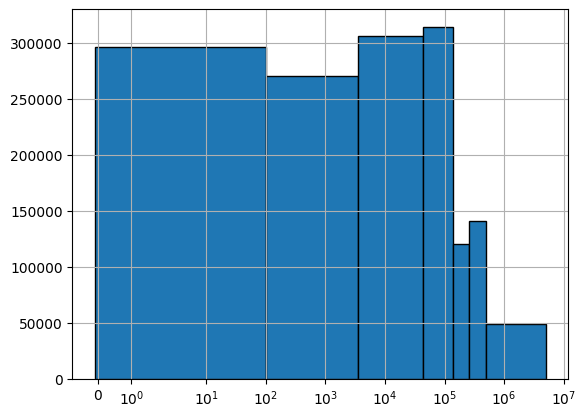

In [42]:
deciles = df['Time_Diff_Last_Trans_Sen'].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9])
print(deciles)
#create an histogram with Time_Diff_Last_Trans_Sen

plt.xscale('symlog')
bins=[-0.1,100,3600, 44000, 140000, 260000,500000,5000000]
df["Time_Diff_Last_Trans_Sen"].hist(bins=bins, align='mid',edgecolor='black')

df['Time_Diff_Last_Trans_Sen'] = pd.cut(df['Time_Diff_Last_Trans_Sen'], bins=bins, include_lowest=True, labels=["CERO","POCO","12H","1DIA", "3DIA","SEMANA","MUCHO"])
print(df['Time_Diff_Last_Trans_Sen'].value_counts())
print(df["Time_Diff_Last_Trans_Sen"].isna().sum())



In [43]:
df.sort_values('Time_step', inplace=True)
# Agrupar por Bene_Account
df_group_bene = df.groupby('Bene_Account')

# Calcular la diferencia de tiempo en segundos
df['Time_Diff_Last_Trans_Ben'] = (df['Time_step'] - df_group_bene['Time_step'].shift()).dt.total_seconds().fillna(0)


In [44]:
#get statistics of Time_Diff_Last_Trans_Sen
df["Time_Diff_Last_Trans_Ben"].describe()
df_num["Time_Diff_Last_Trans_Ben"]=df["Time_Diff_Last_Trans_Ben"]

C:\Users\docam\AppData\Local\Temp\ipykernel_4284\2221156514.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num["Time_Diff_Last_Trans_Ben"]=df["Time_Diff_Last_Trans_Ben"]


In [45]:
# Sort the data by 'Sender_Account' and 'Time_step'
df.sort_values(by=['Bene_Account', 'Time_step'], inplace=True)

# Define a function to compute the running average excluding the first transaction
def running_average(series):
    return series.shift().expanding().mean().fillna(0)

# Apply the function to each group
df['Average_Diff_Time_Rec'] = df.groupby('Bene_Account')['Time_Diff_Last_Trans_Ben'].apply(running_average)
df['Average_Diff_Time_Rec'] = df['Average_Diff_Time_Rec'].round(2)
df.reset_index(drop=True, inplace=True)

In [46]:
df['Average_Diff_Time_Rec'].describe()
df_num["Average_Diff_Time_Rec"]=df["Average_Diff_Time_Rec"]

C:\Users\docam\AppData\Local\Temp\ipykernel_4284\1372895348.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num["Average_Diff_Time_Rec"]=df["Average_Diff_Time_Rec"]


215893

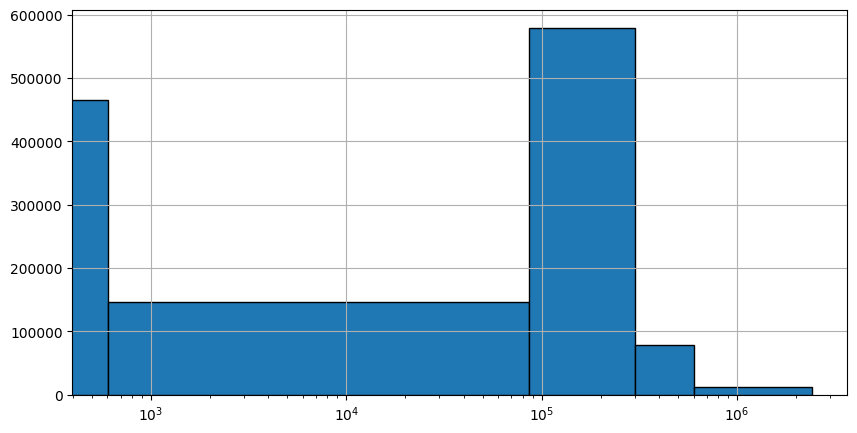

In [47]:
bins=[-0.1,601,86400,300800,601600,2419200]
labels = ["0" ,"24h", '1 week', '1 month', 'more 1 month']
plt.xscale("log")
df['Average_Diff_Time_Rec'].hist(bins=bins, figsize=(10,5),edgecolor="black")
df['Average_Diff_Time_Rec'] = pd.cut(df['Average_Diff_Time_Rec'], bins=bins, labels=labels, right=False)
df['Average_Diff_Time_Rec'].value_counts()
df['Average_Diff_Time_Rec'].isna().sum()

0.1         0.0
0.2         0.0
0.3         0.0
0.4      1200.0
0.5     45000.0
0.6    129600.0
0.7    178200.0
0.8    309000.0
0.9    564000.0
Name: Time_Diff_Last_Trans_Ben, dtype: float64
CERO      512217
1DIA      258998
SEMANA    209897
MUCHO     171321
3DIA      140603
POCO      112879
12H        92239
Name: Time_Diff_Last_Trans_Ben, dtype: int64
0


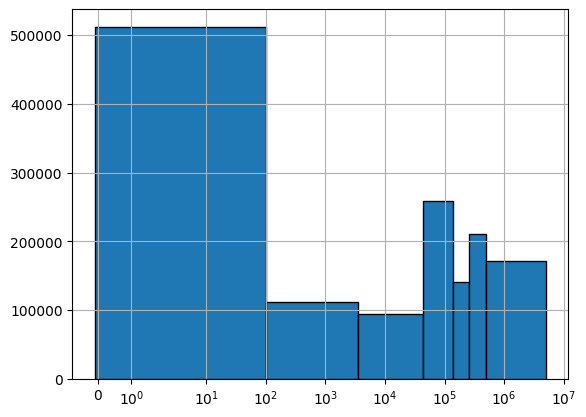

In [48]:
deciles = df['Time_Diff_Last_Trans_Ben'].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9])
print(deciles)
#create an histogram with Time_Diff_Last_Trans_Sen

plt.xscale('symlog')
bins=[-0.1,100,3600, 44000, 140000, 260000,500000,5000000]
df["Time_Diff_Last_Trans_Ben"].hist(bins=bins, align='mid',edgecolor='black')

df['Time_Diff_Last_Trans_Ben'] = pd.cut(df['Time_Diff_Last_Trans_Ben'], bins=bins, include_lowest=True, labels=["CERO","POCO","12H","1DIA", "3DIA","SEMANA","MUCHO"])
print(df['Time_Diff_Last_Trans_Ben'].value_counts())
#check NA values in Time_Diff_Last_Trans_Ben
print(df["Time_Diff_Last_Trans_Ben"].isna().sum())


In [49]:
df_grouped = df.groupby('Sender_Account')
df['average_USD_sent'] = df_grouped['USD_amount'].expanding().mean().shift(fill_value=0).reset_index(level=0, drop=True)


In [50]:
df["average_USD_sent"].describe()
df_num["average_USD_sent"]=df["average_USD_sent"]

C:\Users\docam\AppData\Local\Temp\ipykernel_4284\614111570.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num["average_USD_sent"]=df["average_USD_sent"]


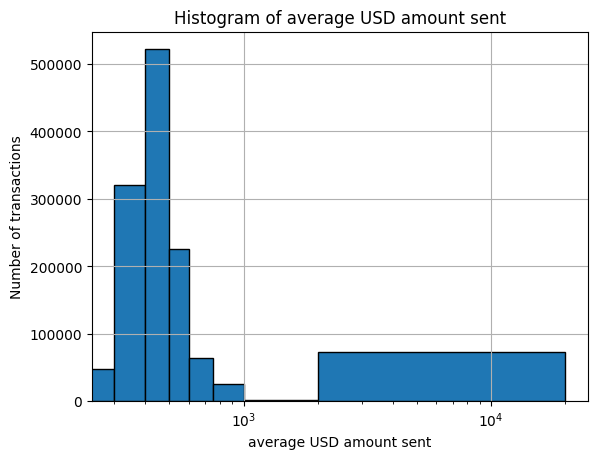

400     521811
300     321057
500     225652
5000     72452
600      63488
100      47561
750      25087
1000      2160
Name: average_USD_sent, dtype: int64


In [51]:
bins=[-0.1,300,400,500,600,750,1000,2000,20000]
df["average_USD_sent"].hist(bins=bins, align='mid',edgecolor='black')
plt.xlabel('average USD amount sent')
plt.xscale('log')
plt.ylabel('Number of transactions')
plt.title('Histogram of average USD amount sent')
plt.show()
df["average_USD_sent"] = pd.cut(df["average_USD_sent"], bins=bins, labels=[ "100","300","400","500","600","750","1000","5000"])
print(df["average_USD_sent"].value_counts())

In [52]:
df_grouped = df.groupby('Bene_Account')
df['average_USD_rec'] = df_grouped['USD_amount'].expanding().mean().shift(fill_value=0).reset_index(level=0, drop=True)

In [53]:
df["average_USD_rec"].describe()
df_num["average_USD_rec"]=df["average_USD_rec"]

C:\Users\docam\AppData\Local\Temp\ipykernel_4284\628026683.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num["average_USD_rec"]=df["average_USD_rec"]


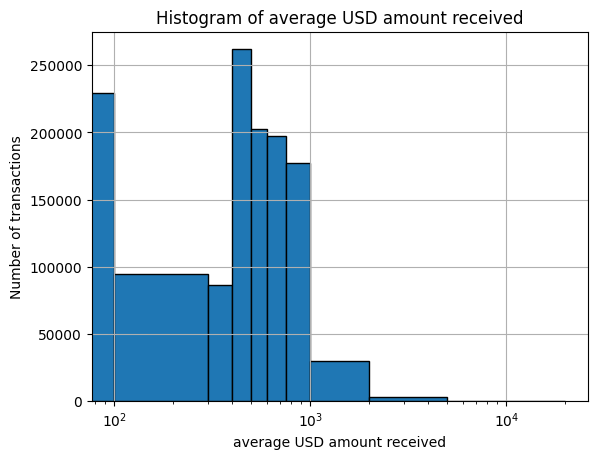

400     261887
10      229276
500     202228
600     197211
750     177007
100      94600
300      86733
1000     29842
2000      3277
5000       200
Name: average_USD_rec, dtype: int64


In [54]:
bins=[-0.1,100,300,400,500,600,750,1000,2000,5000,20000]
df["average_USD_rec"].hist(bins=bins, align='mid',edgecolor='black')
plt.xlabel('average USD amount received')
plt.xscale('log')
plt.ylabel('Number of transactions')
plt.title('Histogram of average USD amount received')
plt.show()
df["average_USD_rec"] = pd.cut(df["average_USD_rec"], bins=bins, labels=["10", "100","300","400","500","600","750","1000","2000","5000",])
print(df["average_USD_rec"].value_counts())

In [55]:
df['Max_USD_Sent'] = df.groupby('Sender_Account')['USD_amount'].transform('max')
df['Max_USD_Rec'] = df.groupby('Bene_Account')['USD_amount'].transform('max')
df['Min_USD_Sent'] = df.groupby('Sender_Account')['USD_amount'].transform('min')
df['Min_USD_Rec'] = df.groupby('Bene_Account')['USD_amount'].transform('min')

df_num["Max_USD_Sent"]=df["Max_USD_Sent"]
df_num["Max_USD_Rec"]=df["Max_USD_Rec"]
df_num["Min_USD_Sent"]=df["Min_USD_Sent"]
df_num["Min_USD_Rec"]=df["Min_USD_Rec"]

C:\Users\docam\AppData\Local\Temp\ipykernel_4284\2993994223.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num["Max_USD_Sent"]=df["Max_USD_Sent"]
C:\Users\docam\AppData\Local\Temp\ipykernel_4284\2993994223.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num["Max_USD_Rec"]=df["Max_USD_Rec"]
C:\Users\docam\AppData\Local\Temp\ipykernel_4284\2993994223.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [56]:
df['Max_USD_Sent'].describe()

count    1.279268e+06
mean     1.151682e+03
std      1.226681e+03
min      9.157000e+01
25%      9.548900e+02
50%      9.797200e+02
75%      9.931000e+02
max      1.992799e+04
Name: Max_USD_Sent, dtype: float64

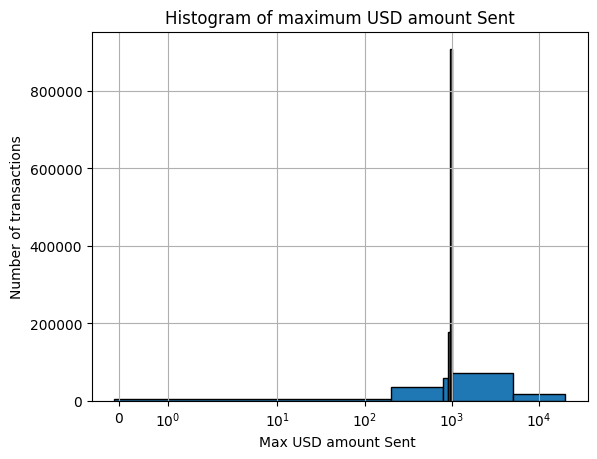

MUCHO         906794
MEDIO         179077
MUCHISIMO      71797
MEDIO POCO     60452
POCO           36290
MAXIMO         18802
MUY POCO        6056
Name: Max_USD_Sent, dtype: int64


In [57]:
bins=[-0.1,200,800,900,950,1000,5000,20000]
df["Max_USD_Sent"].hist(bins=bins, align='mid',edgecolor='black')
plt.xlabel('Max USD amount Sent ')
plt.xscale('symlog')
plt.ylabel('Number of transactions')
plt.title('Histogram of maximum USD amount Sent')
plt.show()

df["Max_USD_Sent"] = pd.cut(df["Max_USD_Sent"], bins=bins, labels=["MUY POCO", "POCO","MEDIO POCO","MEDIO","MUCHO","MUCHISIMO","MAXIMO"])
print(df["Max_USD_Sent"].value_counts())



In [58]:
df['Max_USD_Rec'].describe()

count    1.282261e+06
mean     1.258823e+03
std      1.482986e+03
min      1.000000e-02
25%      5.970600e+02
50%      9.719200e+02
75%      2.000660e+03
max      1.999894e+04
Name: Max_USD_Rec, dtype: float64

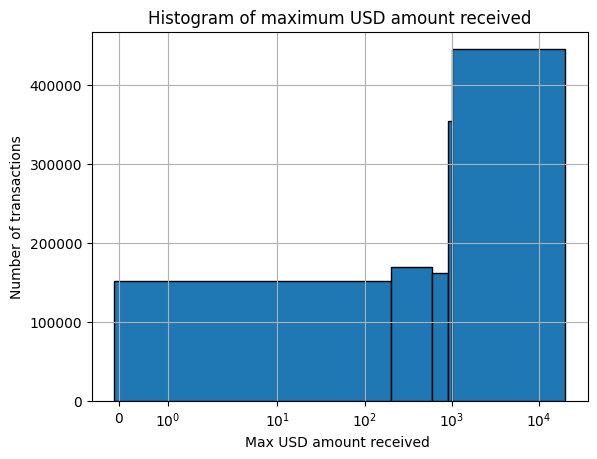

MAXIMO      444928
MUCHO       353504
POCO        169575
MEDIO       162230
MUY POCO    152024
Name: Max_USD_Rec, dtype: int64


In [59]:
bins=[-0.1,200,600,900,1000,20000]
df["Max_USD_Rec"].hist(bins=bins, align='mid',edgecolor='black')
plt.xlabel('Max USD amount received ')
plt.xscale('symlog')
plt.ylabel('Number of transactions')
plt.title('Histogram of maximum USD amount received')
plt.show()

df["Max_USD_Rec"] = pd.cut(df["Max_USD_Rec"], bins=bins, labels=["MUY POCO", "POCO","MEDIO","MUCHO","MAXIMO"])
print(df["Max_USD_Rec"].value_counts())

In [60]:
df['Min_USD_Sent'].describe()

count    1.279268e+06
mean     1.489600e+02
std      4.676054e+02
min      1.000000e-02
25%      3.540000e+00
50%      9.670000e+00
75%      3.175000e+01
max      1.907559e+04
Name: Min_USD_Sent, dtype: float64

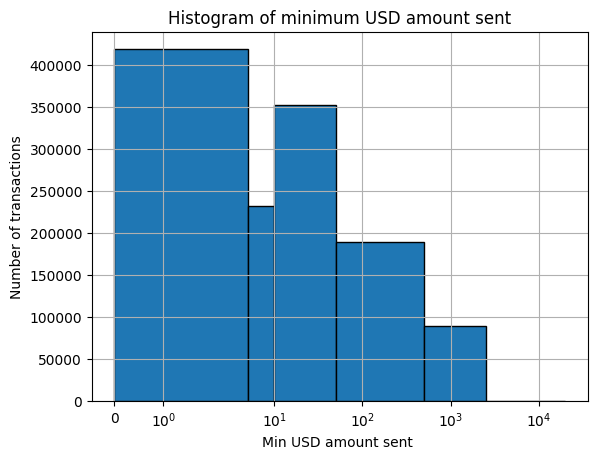

MUY POCO     418958
MEDIO        351023
POCO         231844
MUCHO        188565
MUCHISIMO     88832
MAXIMO           46
Name: Min_USD_Sent, dtype: int64
218886


In [61]:
bins=[0,5,10,50,500,2500,20000]
df["Min_USD_Sent"].hist(bins=bins, align='mid',edgecolor='black')
plt.xlabel('Min USD amount sent ')
plt.xscale('symlog')
plt.ylabel('Number of transactions')
plt.title('Histogram of minimum USD amount sent')
plt.show()

df["Min_USD_Sent"] = pd.cut(df["Min_USD_Sent"], bins=bins, labels=["MUY POCO", "POCO","MEDIO","MUCHO","MUCHISIMO","MAXIMO"])
print(df["Min_USD_Sent"].value_counts())
print(df["Min_USD_Sent"].isna().sum())

In [62]:
df['Min_USD_Rec'].describe()

count    1.282261e+06
mean     1.209566e+02
std      1.128643e+02
min      1.000000e-02
25%      8.855000e+01
50%      1.001800e+02
75%      1.006700e+02
max      9.000940e+03
Name: Min_USD_Rec, dtype: float64

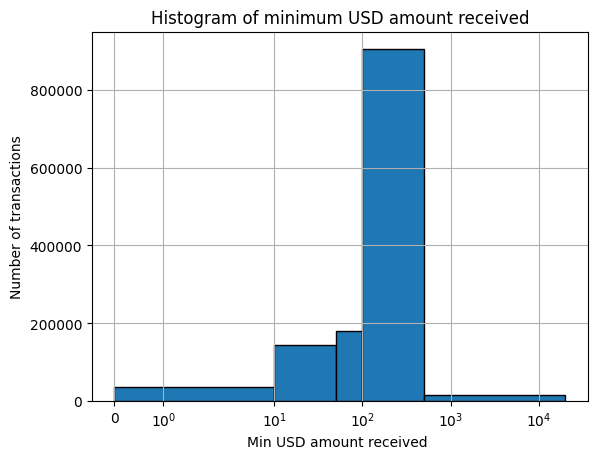

MUCHO       886579
MEDIO       199354
POCO        145011
MUY POCO     35927
MAXIMO       15390
Name: Min_USD_Rec, dtype: int64
215893


In [63]:
bins=[0,10,50,100,500,20000]
df["Min_USD_Rec"].hist(bins=bins, align='mid',edgecolor='black')
plt.xlabel('Min USD amount received ')
plt.xscale('symlog')
plt.ylabel('Number of transactions')
plt.title('Histogram of minimum USD amount received')
plt.show()

df["Min_USD_Rec"] = pd.cut(df["Min_USD_Rec"], bins=bins, labels=["MUY POCO", "POCO","MEDIO","MUCHO","MAXIMO"])
print(df["Min_USD_Rec"].value_counts())
print(df["Min_USD_Rec"].isna().sum())

In [64]:
"""
# 'Time_step' es la columna de fecha y hora de la transacción
df['Time_step'] = pd.to_datetime(df['Time_step'])

# Añadir un pequeño valor aleatorio a 'Time_step' para asegurarte de que es único
df['Time_step'] += pd.to_timedelta(np.random.uniform(low=0, high=1, size=len(df)), unit='ms')

# Ordenamos el dataframe por 'Time_step'
df = df.sort_values(by='Time_step')

# Calculamos la cantidad de transacciones en los últimos n días para cada remitente
for n in [1, 7, 30]:  # días
    sender_counts = df.groupby('Sender_Account').rolling(f'{n}D', on='Time_step')['Transaction_Id'].count().reset_index(name=f'Sender_Transactions_Last_{n}_Days')
    df = pd.merge(df, sender_counts, on=['Sender_Account', 'Time_step'], how='left')

# Calculamos la cantidad de transacciones en los últimos n días para cada beneficiario
for n in [1, 7, 30]:  # días
    bene_counts = df.groupby('Bene_Account').rolling(f'{n}D', on='Time_step')['Transaction_Id'].count().reset_index(name=f'Bene_Transactions_Last_{n}_Days')
    df = pd.merge(df, bene_counts, on=['Bene_Account', 'Time_step'], how='left')
#df_num["Sender_Transactions_Last_1_Days"]=df["Sender_Transactions_Last_1_Days"]
df_num["Sender_Transactions_Last_30_Days"]=df["Sender_Transactions_Last_30_Days"]
df_num["Sender_Transactions_Last_7_Days"]=df["Sender_Transactions_Last_7_Days"]
df_num["Bene_Transactions_Last_1_Days"]=df["Bene_Transactions_Last_1_Days"]
df_num["Bene_Transactions_Last_30_Days"]=df["Bene_Transactions_Last_30_Days"]
df_num["Bene_Transactions_Last_7_Days"]=df["Bene_Transactions_Last_7_Days"]
df_num["Sender_Transactions_Last_1_Days"]=df["Sender_Transactions_Last_1_Days"]
"""
################NaN Values#######################
df['Time_step'] = pd.to_datetime(df['Time_step'])
# Sort the DataFrame by the 'Time_step' column
df = df.sort_values(by='Time_step')
# Añadir un pequeño valor aleatorio a 'Time_step' para asegurarte de que es único
df['Time_step'] += pd.to_timedelta(np.random.uniform(low=0, high=1, size=len(df)), unit='ms')

# Drop any rows with NaN values in the 'Time_step' column
df = df.dropna(subset=['Time_step'])

# Calculate the number of transactions in the last n days for each Sender_Account
for n in [1, 7, 30]:  # days
    sender_counts = df.groupby('Sender_Account').rolling(f'{n}D', on='Time_step')['Transaction_Id'].count().reset_index(name=f'Sender_Transactions_Last_{n}_Days')
    df = pd.merge(df, sender_counts, on=['Sender_Account', 'Time_step'], how='left')

# Calculate the number of transactions in the last n days for each Bene_Account
for n in [1, 7, 30]:  # days
    bene_counts = df.groupby('Bene_Account').rolling(f'{n}D', on='Time_step')['Transaction_Id'].count().reset_index(name=f'Bene_Transactions_Last_{n}_Days')
    df = pd.merge(df, bene_counts, on=['Bene_Account', 'Time_step'], how='left')


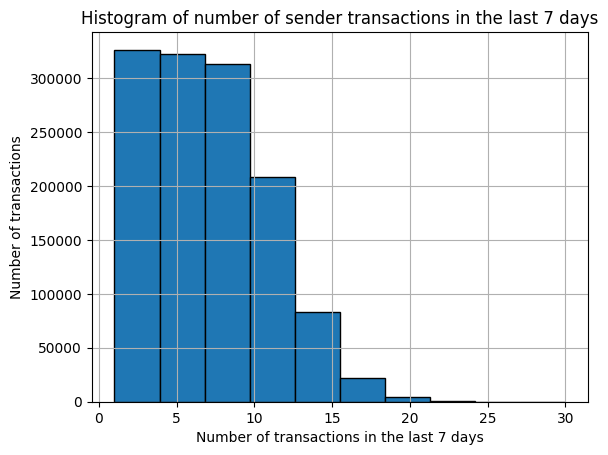

MAXIMO    415269
MUCHO     326010
POCO      224395
MEDIO     211812
CERO      101778
Name: Sender_Transactions_Last_7_Days, dtype: int64
218890


In [65]:
df["Sender_Transactions_Last_7_Days"].describe()
bins=[0,1,3,5,8,27]
df["Sender_Transactions_Last_7_Days"].hist( align='mid',edgecolor='black')
plt.xlabel('Number of transactions in the last 7 days')
plt.ylabel('Number of transactions')
plt.title('Histogram of number of sender transactions in the last 7 days')
plt.show()
df["Sender_Transactions_Last_7_Days"] = pd.cut(df["Sender_Transactions_Last_7_Days"], bins=bins, labels=["CERO", "POCO","MEDIO","MUCHO","MAXIMO"])
print(df["Sender_Transactions_Last_7_Days"].value_counts())
print(df["Sender_Transactions_Last_7_Days"].isna().sum())

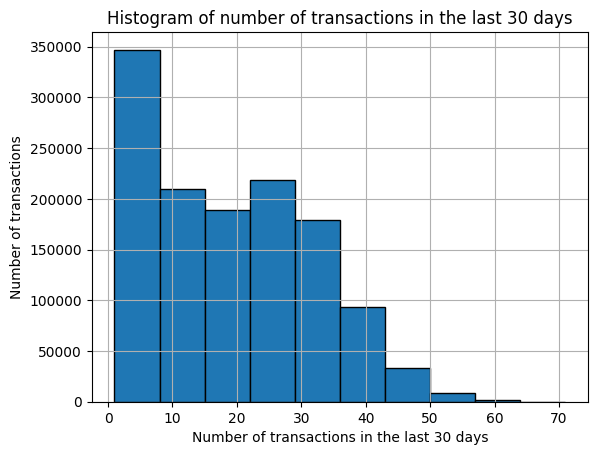

MAXIMO    410386
MUCHO     286537
POCO      271399
MEDIO     235256
CERO       75623
Name: Sender_Transactions_Last_30_Days, dtype: int64
218953


In [66]:
df["Sender_Transactions_Last_30_Days"].describe()

bins=[0,1,7,15,25,65]
df["Sender_Transactions_Last_30_Days"].hist( align='mid',edgecolor='black')
plt.xlabel('Number of transactions in the last 30 days')
plt.ylabel('Number of transactions')
plt.title('Histogram of number of transactions in the last 30 days')
plt.show()
df["Sender_Transactions_Last_30_Days"] = pd.cut(df["Sender_Transactions_Last_30_Days"], bins=bins, labels=["CERO", "POCO","MEDIO","MUCHO","MAXIMO"])
print(df["Sender_Transactions_Last_30_Days"].value_counts())
print(df["Sender_Transactions_Last_30_Days"].isna().sum())


In [67]:
df["Sender_Transactions_Last_1_Days"].describe()

count    1.279268e+06
mean     1.842469e+00
std      1.003831e+00
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      2.000000e+00
max      1.200000e+01
Name: Sender_Transactions_Last_1_Days, dtype: float64

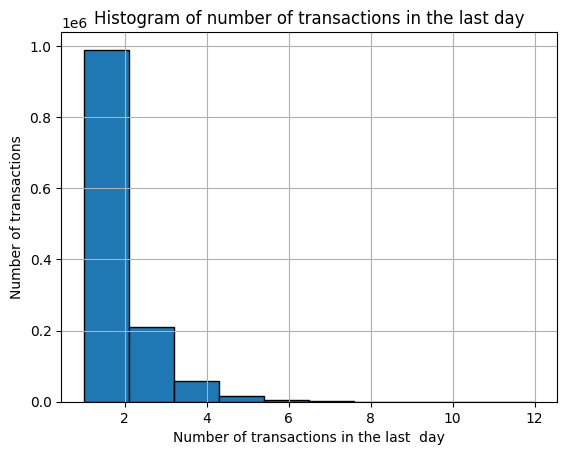

CERO     603745
POCO     385483
MEDIO    290040
Name: Sender_Transactions_Last_1_Days, dtype: int64
218886


In [68]:
bins=[0,1,2,12]
df["Sender_Transactions_Last_1_Days"].hist( align='mid',edgecolor='black')
plt.xlabel('Number of transactions in the last  day')
plt.ylabel('Number of transactions')
plt.title('Histogram of number of transactions in the last day')
plt.show()
df["Sender_Transactions_Last_1_Days"] = pd.cut(df["Sender_Transactions_Last_1_Days"], bins=bins, labels=["CERO", "POCO","MEDIO"])
print(df["Sender_Transactions_Last_1_Days"].value_counts())
print(df["Sender_Transactions_Last_1_Days"].isna().sum())

In [69]:
df['Bene_Transactions_Last_7_Days'].describe()


count    1.282261e+06
mean     3.096288e+00
std      2.292351e+00
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      4.000000e+00
max      1.900000e+01
Name: Bene_Transactions_Last_7_Days, dtype: float64

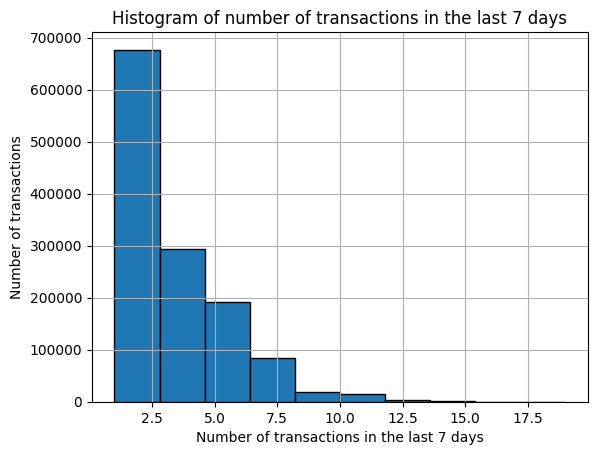

MUCHO    451439
CERO     428963
POCO     247615
MEDIO    154244
Name: Bene_Transactions_Last_7_Days, dtype: int64
215893


In [70]:
bins=[0,1,2,3,20]
df["Bene_Transactions_Last_7_Days"].hist( align='mid',edgecolor='black')
plt.xlabel('Number of transactions in the last 7 days')
plt.ylabel('Number of transactions')
plt.title('Histogram of number of transactions in the last 7 days')
plt.show()
df["Bene_Transactions_Last_7_Days"] = pd.cut(df["Bene_Transactions_Last_7_Days"], bins=bins, labels=["CERO", "POCO","MEDIO","MUCHO"])
print(df["Bene_Transactions_Last_7_Days"].value_counts())
print(df["Bene_Transactions_Last_7_Days"].isna().sum())

In [71]:
df["Bene_Transactions_Last_30_Days"].describe()

count    1.282261e+06
mean     7.676914e+00
std      7.326180e+00
min      1.000000e+00
25%      2.000000e+00
50%      5.000000e+00
75%      1.200000e+01
max      4.400000e+01
Name: Bene_Transactions_Last_30_Days, dtype: float64

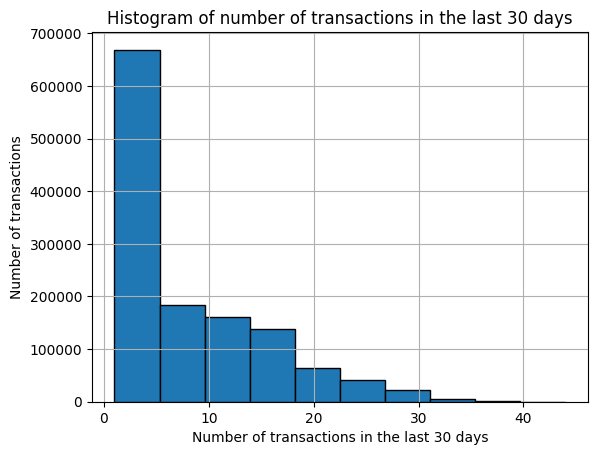

MUCHO    625594
CERO     303391
POCO     164743
MEDIO     92230
Name: Bene_Transactions_Last_30_Days, dtype: int64
312196


In [72]:
bins=[0,1,2,3,20]
df["Bene_Transactions_Last_30_Days"].hist( align='mid',edgecolor='black')
plt.xlabel('Number of transactions in the last 30 days')
plt.ylabel('Number of transactions')
plt.title('Histogram of number of transactions in the last 30 days')
plt.show()
df["Bene_Transactions_Last_30_Days"] = pd.cut(df["Bene_Transactions_Last_30_Days"], bins=bins, labels=["CERO", "POCO","MEDIO","MUCHO"])
print(df["Bene_Transactions_Last_30_Days"].value_counts())
print(df["Bene_Transactions_Last_30_Days"].isna().sum())

In [73]:
df["Bene_Transactions_Last_1_Days"].describe()


count    1.282261e+06
mean     1.273267e+00
std      5.986370e-01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+01
Name: Bene_Transactions_Last_1_Days, dtype: float64

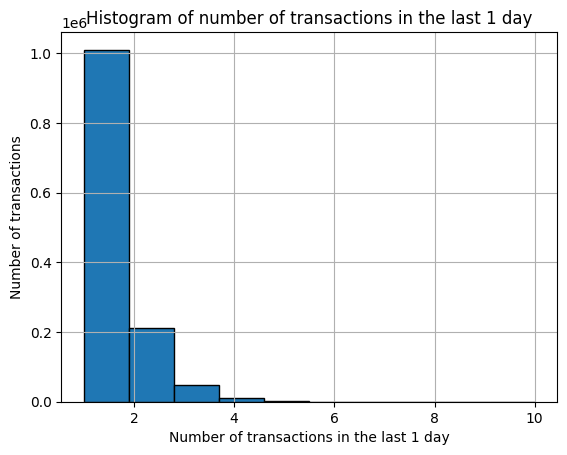

CERO     1010695
POCO      210869
MEDIO      60697
Name: Bene_Transactions_Last_1_Days, dtype: int64
215893


In [74]:
bins=[0,1,2,10]
df["Bene_Transactions_Last_1_Days"].hist( align='mid',edgecolor='black')
plt.xlabel('Number of transactions in the last 1 day')
plt.ylabel('Number of transactions')
plt.title('Histogram of number of transactions in the last 1 day')
plt.show()
df["Bene_Transactions_Last_1_Days"] = pd.cut(df["Bene_Transactions_Last_1_Days"], bins=bins, labels=["CERO", "POCO","MEDIO"])
print(df["Bene_Transactions_Last_1_Days"].value_counts())
print(df["Bene_Transactions_Last_1_Days"].isna().sum())

In [75]:

print(df[df['Sender_Account'] == "ACCOUNT-8957" ].head(10))

                        Time_step      Transaction_Id    Sender_Id  \
50  2022-03-15 10:24:00.000246606  QUICK-PAYMENT-8964  JPMC-CLIENT   
114 2022-03-15 10:34:00.000775844     MOVE-FUNDS-8967  JPMC-CLIENT   
152 2022-03-15 11:04:00.000937053       PAY-BILL-8972  JPMC-CLIENT   
216 2022-03-15 23:04:00.000690820       PAY-BILL-8971  JPMC-CLIENT   
343 2022-03-16 23:04:00.000499023     WITHDRAWAL-8974  JPMC-CLIENT   
411 2022-03-17 11:04:00.000438671     WITHDRAWAL-8975  JPMC-CLIENT   
505 2022-03-17 23:14:00.000576664   MAKE-PAYMENT-8976  JPMC-CLIENT   
520 2022-03-17 23:34:00.000881698     WITHDRAWAL-8979  JPMC-CLIENT   
524 2022-03-17 23:44:00.000455111       PAY-BILL-8980  JPMC-CLIENT   
649 2022-03-18 23:54:00.000118495      PAY-CHECK-8984  JPMC-CLIENT   

    Sender_Account Sender_Country  Sender_Sector  Sender_lob       Bene_Id  \
50    ACCOUNT-8957            USA        23505.0           1        CLIENT   
114   ACCOUNT-8957            USA        12491.0           1        CLIEN

In [76]:
print(df[df['Sender_Account'] == "ACCOUNT-8966" ].head(10))

                         Time_step      Transaction_Id Sender_Id  \
498  2022-03-17 23:04:00.000901925     MOVE-FUNDS-8977    CLIENT   
1142 2022-03-22 12:44:00.000614018      PAY-CHECK-9001    CLIENT   
1438 2022-03-24 13:34:00.000509486   MAKE-PAYMENT-9010    CLIENT   
1590 2022-03-25 13:54:00.000072207  QUICK-PAYMENT-9023    CLIENT   
1840 2022-03-27 15:34:00.000679558   MAKE-PAYMENT-9028    CLIENT   
2029 2022-03-29 04:14:00.000919640      PAY-CHECK-9035    CLIENT   
3931 2022-04-12 19:04:00.000503661  QUICK-PAYMENT-9100    CLIENT   
3996 2022-04-13 07:04:00.000171491  QUICK-PAYMENT-9101    CLIENT   
4205 2022-04-14 19:04:00.000190014  QUICK-PAYMENT-9104    CLIENT   
4280 2022-04-15 07:14:00.000159222  QUICK-PAYMENT-9105    CLIENT   

     Sender_Account Sender_Country  Sender_Sector  Sender_lob      Bene_Id  \
498    ACCOUNT-8966             AF        18401.0           1  JPMC-CLIENT   
1142   ACCOUNT-8966             AF        29796.0           1  JPMC-CLIENT   
1438   ACCOUNT-89

In [77]:
#drop from df columns 'Time_step', 'Transaction_Id',"Sender_Sector, "Bene_Account".
df = df.drop(['Time_step', 'Transaction_Id',"Sender_Sector","Sender_Account", "Bene_Account"], axis=1)


count    1.498154e+06
mean     5.134774e+02
std      5.398095e+02
min      1.000000e-02
25%      1.387100e+02
50%      4.041700e+02
75%      7.340700e+02
max      1.999894e+04
Name: USD_amount, dtype: float64
[0, 1, 10, 100, 250, 500, 1000, 20000]


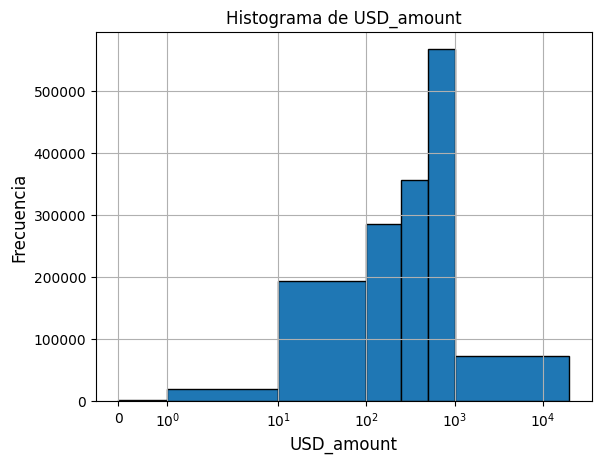

ALTA         567383
CASI ALTA    356801
MEDIO        284589
NORMAL       195107
MUY ALTA      72893
POCO          19273
MUY POCO       2108
Name: USD_amount, dtype: int64


In [78]:
#show statistics of USD_amount in df
print(df['USD_amount'].describe())
plt.xscale('symlog')
bins=[0,1,10, 100,250, 500, 1000, 20000]
print(bins)
df["USD_amount"].hist(bins=bins, align='mid',edgecolor='black')
plt.xlabel('USD_amount', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Histograma de USD_amount', fontsize=12)
plt.show()
##discretiza los valores de la columna en, los iguales a 0,1,10, 100,500, 1000, 10000
df['USD_amount'] = pd.cut(df['USD_amount'], bins=bins, labels=["MUY POCO", "POCO", "NORMAL", "MEDIO","CASI ALTA", "ALTA", "MUY ALTA"])
print(df['USD_amount'].value_counts())



count    1.498154e+06
mean     5.134774e+02
std      5.398095e+02
min      1.000000e-02
25%      1.387100e+02
50%      4.041700e+02
75%      7.340700e+02
max      1.999894e+04
Name: USD_amount, dtype: float64
[0, 1, 10, 100, 1000, 20000]


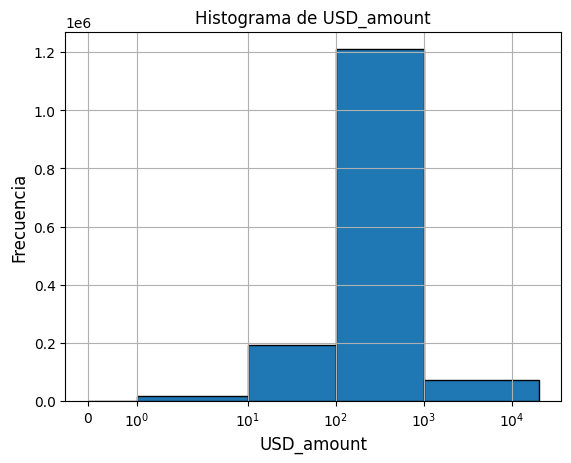

In [79]:
#show statistics of USD_amount in df
print(df_num['USD_amount'].describe())
bins=[0,1,10, 100, 1000, 20000]
print(bins)
plt.xscale("symlog")
df_num["USD_amount"].hist( bins=bins,align='mid',edgecolor='black')
plt.xlabel('USD_amount', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Histograma de USD_amount', fontsize=12)
plt.show()


In [80]:
df["Sender_lob"].value_counts()

1    1279268
0     218886
Name: Sender_lob, dtype: int64

1498154
Sender_Id                           218886
Sender_Country                           0
Sender_lob                               0
Bene_Id                             215893
Bene_Country                             0
USD_amount                               0
Label                                    0
Transaction_Type                         0
National_Transaction                     0
Bene_ClienteJP                           0
Sen_ClienteJP                            0
Sender_Company                           0
JPMC_Transaction                         0
Time_Diff_Last_Trans_Sen                 0
Average_Diff_Time_Sent              218886
Time_Diff_Last_Trans_Ben                 0
Average_Diff_Time_Rec               215893
average_USD_sent                    218886
average_USD_rec                     215893
Max_USD_Sent                        218886
Max_USD_Rec                         215893
Min_USD_Sent                        218886
Min_USD_Rec                         215893
Sen

<AxesSubplot:ylabel='USD_amount'>

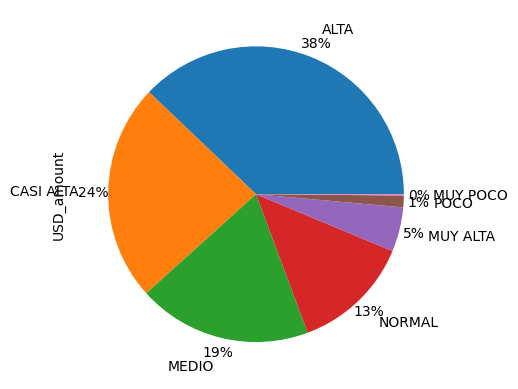

In [81]:
print(df['USD_amount'].value_counts().sum())
print(df.isna().sum())
print(df.columns)
#crea un pie chart con los valores de la columna USD_amount
df['USD_amount'].value_counts().plot(kind='pie', autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)

In [82]:
print(df_num.columns)
df_num["Label"]=df["Label"]
df_num.head()

Index(['USD_amount', 'Label', 'Sender_Company', 'Time_Diff_Last_Trans_Sen',
       'Average_Diff_Time_Sent', 'Time_Diff_Last_Trans_Ben',
       'Average_Diff_Time_Rec', 'average_USD_sent', 'average_USD_rec',
       'Max_USD_Sent', 'Max_USD_Rec', 'Min_USD_Sent', 'Min_USD_Rec'],
      dtype='object')


C:\Users\docam\AppData\Local\Temp\ipykernel_4284\4052227128.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num["Label"]=df["Label"]


,USD_amount,Label,Sender_Company,Time_Diff_Last_Trans_Sen,Average_Diff_Time_Sent,Time_Diff_Last_Trans_Ben,Average_Diff_Time_Rec,average_USD_sent,average_USD_rec,Max_USD_Sent,Max_USD_Rec,Min_USD_Sent,Min_USD_Rec
0,558.43,0.0,0,0.0,0.0,306000.0,0.0,610.130000,0.000000,967.13,33.50,0.30,33.50
1,622.78,0.0,0,0.0,0.0,1800.0,0.0,679.966667,33.500000,992.51,846.76,17.12,94.18
2,802.54,0.0,0,0.0,0.0,600.0,0.0,461.080000,94.180000,965.86,846.76,3.53,94.18
3,989.09,0.0,0,0.0,0.0,0.0,45600.0,541.770000,317.975000,965.86,846.76,3.53,94.18
4,786.78,0.0,0,44400.0,0.0,0.0,45200.0,94.180000,407.686667,992.51,846.76,17.12,94.18


CORRELATION VALUES


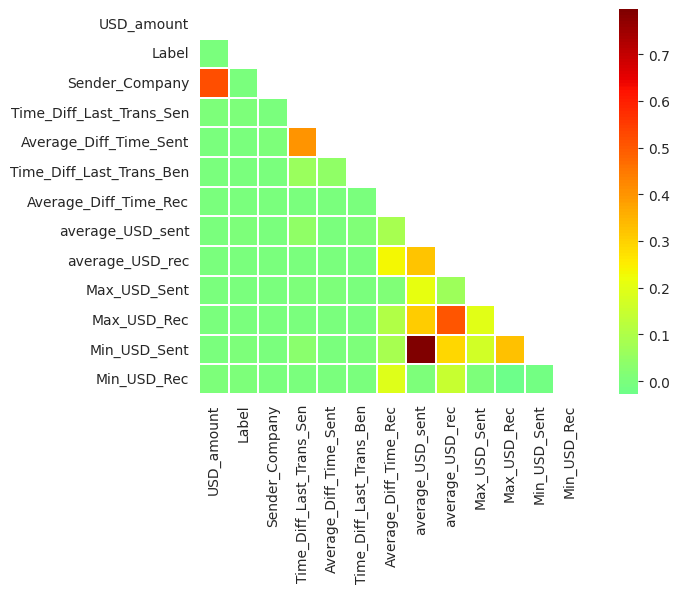

In [83]:
corr = df_num.corr()
print ("CORRELATION VALUES")
#print(corr)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(9,5))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='jet', linewidths=0.1, center=0, square=True)

In [84]:
print(df_num.columns)

Index(['USD_amount', 'Label', 'Sender_Company', 'Time_Diff_Last_Trans_Sen',
       'Average_Diff_Time_Sent', 'Time_Diff_Last_Trans_Ben',
       'Average_Diff_Time_Rec', 'average_USD_sent', 'average_USD_rec',
       'Max_USD_Sent', 'Max_USD_Rec', 'Min_USD_Sent', 'Min_USD_Rec'],
      dtype='object')


C:\Users\docam\AppData\Local\Temp\ipykernel_4284\682109197.py:13: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplots_adjust(wspace=0.7, hspace=0.8)


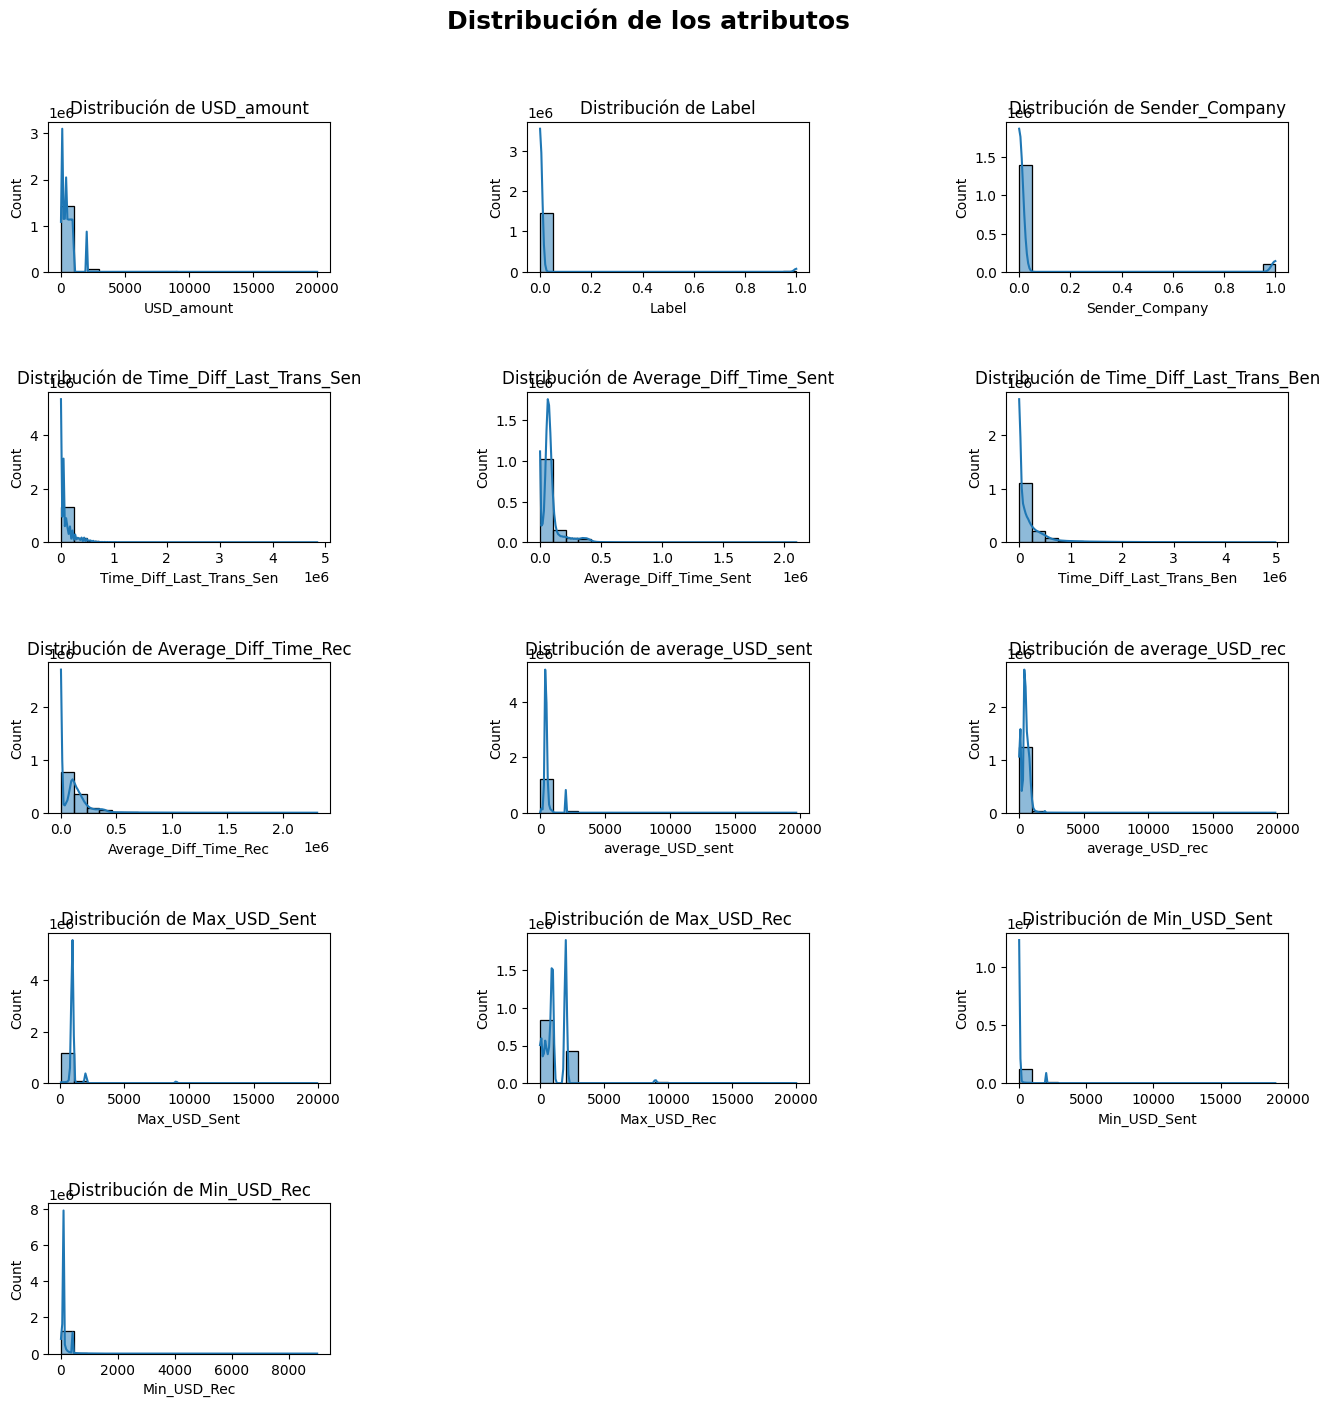

In [85]:
# Quita valores duplicados
df_num = df_num.drop_duplicates()

# Lista de columnas para las cuales se mostrarán los histogramas
columns = ['USD_amount', 'Label', 'Sender_Company',
           'Time_Diff_Last_Trans_Sen', 'Average_Diff_Time_Sent',
           'Time_Diff_Last_Trans_Ben', 'Average_Diff_Time_Rec', 'average_USD_sent',
           'average_USD_rec', 'Max_USD_Sent', 'Max_USD_Rec', 'Min_USD_Sent',
           'Min_USD_Rec']

# Crear subplots
fig, axes = plt.subplots(5, 3, figsize=(16, 16), constrained_layout=True)
plt.subplots_adjust(wspace=0.7, hspace=0.8)
plt.suptitle("Distribución de los atributos", y=0.95, size=18, weight='bold')

# Iterar sobre cada columna y crear un histograma para cada una
for i, column in enumerate(columns):
    row = i // 3
    col = i % 3
    ax = sns.histplot(ax=axes[row, col], data=df_num, x=column, bins=20, kde=True)
    ax.set_title(f'Distribución de {column}')

# Eliminar los ejes adicionales vacíos
for j in range(i+1, 5*3):
    fig.delaxes(axes.flatten()[j])

# Mostrar gráficos
plt.show()

C:\Users\docam\AppData\Local\Temp\ipykernel_4284\4068291998.py:11: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplots_adjust(wspace=0.7, hspace=0.8)


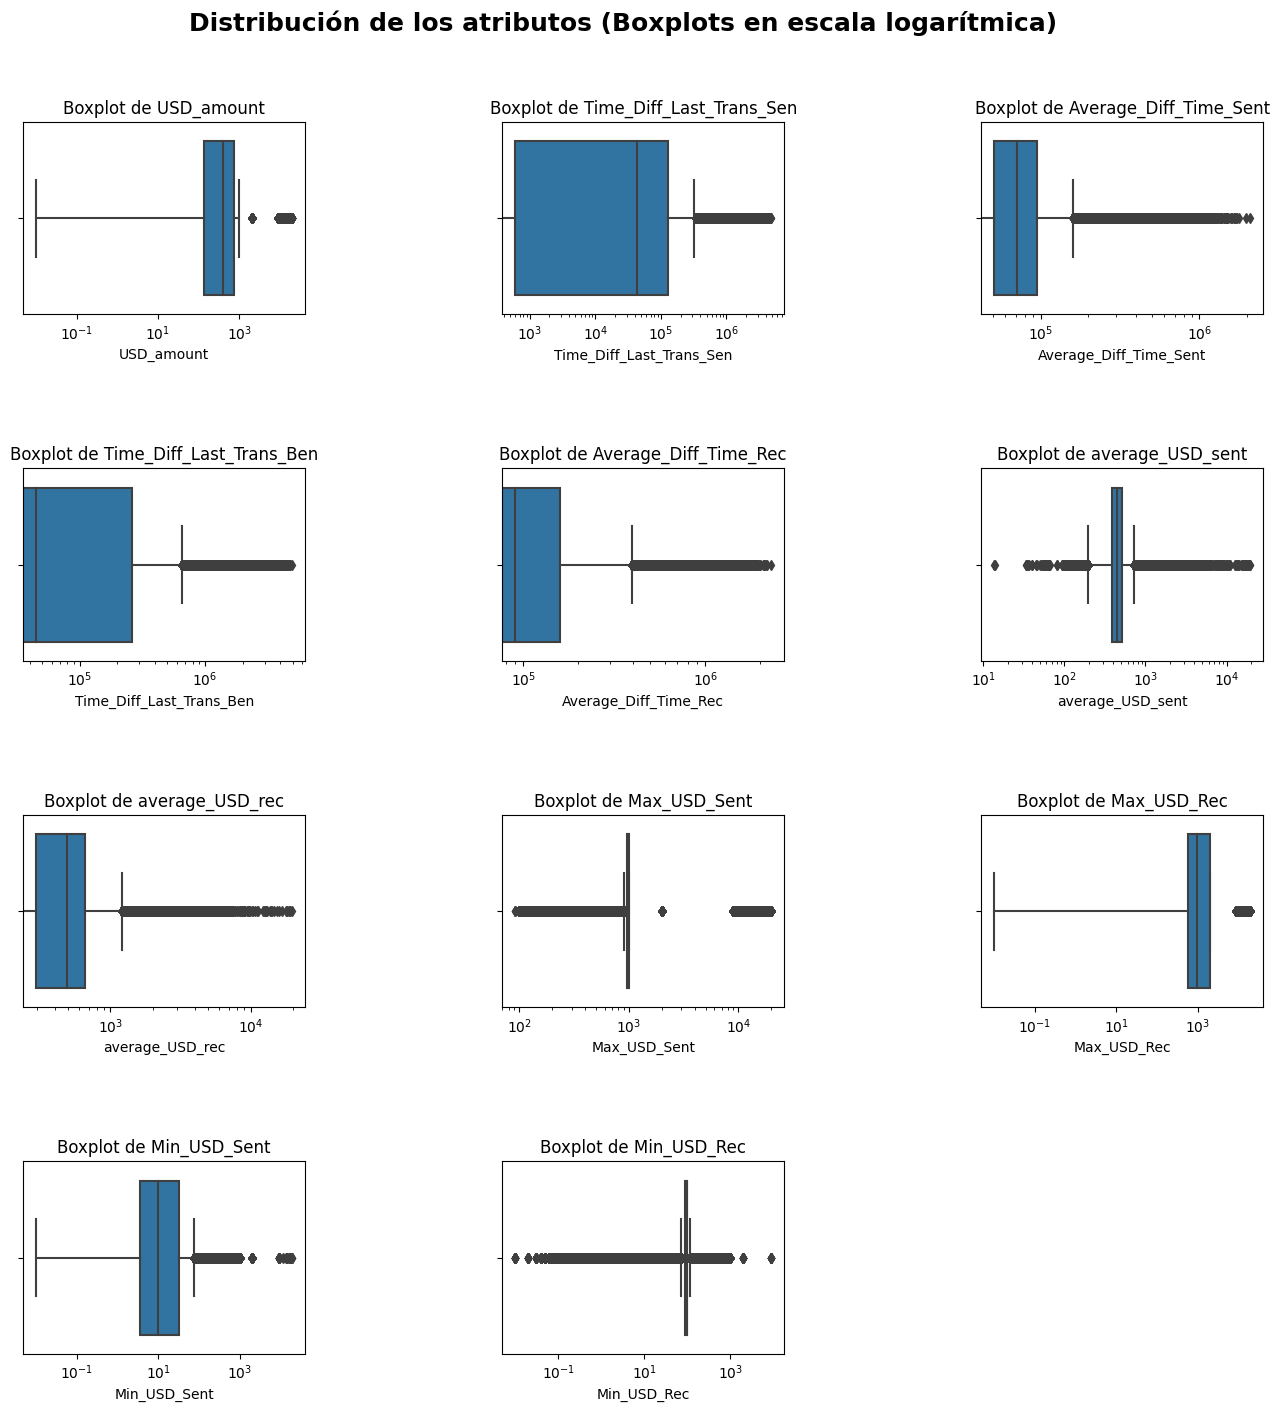

In [86]:
# Lista de columnas para las cuales se mostrarán los gráficos
columns = ['USD_amount', 
           'Time_Diff_Last_Trans_Sen', 'Average_Diff_Time_Sent',
           'Time_Diff_Last_Trans_Ben', 'Average_Diff_Time_Rec', 'average_USD_sent',
           'average_USD_rec', 'Max_USD_Sent', 'Max_USD_Rec', 'Min_USD_Sent',
           'Min_USD_Rec']

# Crear subplots
n_rows = (len(columns) + 2) // 3
fig, axes = plt.subplots(n_rows, 3, figsize=(16, n_rows * 4), constrained_layout=True)
plt.subplots_adjust(wspace=0.7, hspace=0.8)
plt.suptitle("Distribución de los atributos (Boxplots en escala logarítmica)", y=0.95, size=18, weight='bold')

# Iterar sobre cada columna y crear un boxplot para cada una
for i, column in enumerate(columns):
    row = i // 3
    col = i % 3
    ax = sns.boxplot(ax=axes[row, col], data=df_num, x=column)
    ax.set_title(f'Boxplot de {column}')
    
    # Configurar la escala logarítmica en el eje Y
    ax.set_xscale("log")

# Remover los subplots vacíos
for j in range(i+1,  (n_rows * 3)):
    fig.delaxes(axes.flatten()[j])

# Mostrar gráficos
plt.show()

In [87]:

print(df.columns)

df.drop("Min_USD_Sent",axis=1)
# Seleccionar columnas para aplicar one-hot encoding
columns_to_encode = df.columns[0:]

# Filtrar el dataframe con las columnas seleccionadas
df_encoded = df[columns_to_encode]

# Inicializar el codificador one-hot
encoder = OneHotEncoder(handle_unknown='ignore')

# Ajustar el codificador a las columnas seleccionadas
encoder.fit(df_encoded)
print("ENCODER",encoder.get_feature_names_out(columns_to_encode))
# Codificar las columnas seleccionadas
encoded_columns = encoder.transform(df_encoded).toarray()

# create a new dataframe with the encoded columns
df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(columns_to_encode))
print("ENCODED",df.info())
print(df.isna().sum())
# Crear un nuevo dataframe con las columnas codificadas
#encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(df_encoded.columns))



Index(['Sender_Id', 'Sender_Country', 'Sender_lob', 'Bene_Id', 'Bene_Country',
       'USD_amount', 'Label', 'Transaction_Type', 'National_Transaction',
       'Bene_ClienteJP', 'Sen_ClienteJP', 'Sender_Company', 'JPMC_Transaction',
       'Time_Diff_Last_Trans_Sen', 'Average_Diff_Time_Sent',
       'Time_Diff_Last_Trans_Ben', 'Average_Diff_Time_Rec', 'average_USD_sent',
       'average_USD_rec', 'Max_USD_Sent', 'Max_USD_Rec', 'Min_USD_Sent',
       'Min_USD_Rec', 'Sender_Transactions_Last_1_Days',
       'Sender_Transactions_Last_7_Days', 'Sender_Transactions_Last_30_Days',
       'Bene_Transactions_Last_1_Days', 'Bene_Transactions_Last_7_Days',
       'Bene_Transactions_Last_30_Days'],
      dtype='object')
ENCODER ['Sender_Id_BILL-COMPANY' 'Sender_Id_CLIENT' 'Sender_Id_COMPANY'
 'Sender_Id_JPMC-CLIENT' 'Sender_Id_JPMC-COMPANY' 'Sender_Id_nan'
 'Sender_Country_AF' 'Sender_Country_AN' 'Sender_Country_AS'
 'Sender_Country_CANADA' 'Sender_Country_Desconocido' 'Sender_Country_EU'
 'Sende

In [88]:
# Lista de columnas que deseas buscar
columnas_a_buscar = ['Label_0.0', 'Bene_ClienteJP_0', 'National_Transaction_0', 'Sender_USA_0',
                     'Bene_USA_0', 'Sender_Company_0', 'JPMC_Transaction_0',"Label_nan"]

# Obtener el índice de las columnas a eliminar
lista_col_drop = []
for i, col in enumerate(df.columns):
    if col in columnas_a_buscar:
        lista_col_drop.append(i)

# Ahora 'lista_col_drop' es una lista que contiene las posiciones (índices) de las columnas
# especificadas en 'columnas_a_buscar'.

# Puedes utilizar la lista 'lista_col_drop' para eliminar las columnas del DataFrame si lo deseas.

df= df.drop(df.columns[lista_col_drop], axis=1)

In [89]:

df = df.astype(bool)
print(df.info())
print(df.isna().sum())
#rellenar NaN con 0
#df = df.fillna(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1498154 entries, 0 to 1498153
Columns: 162 entries, Sender_Id_BILL-COMPANY to Bene_Transactions_Last_30_Days_nan
dtypes: bool(162)
memory usage: 231.5 MB
None
Sender_Id_BILL-COMPANY                  0
Sender_Id_CLIENT                        0
Sender_Id_COMPANY                       0
Sender_Id_JPMC-CLIENT                   0
Sender_Id_JPMC-COMPANY                  0
                                       ..
Bene_Transactions_Last_30_Days_CERO     0
Bene_Transactions_Last_30_Days_MEDIO    0
Bene_Transactions_Last_30_Days_MUCHO    0
Bene_Transactions_Last_30_Days_POCO     0
Bene_Transactions_Last_30_Days_nan      0
Length: 162, dtype: int64


In [90]:
# Obtener el índice de la columna "Label_1.0"
label_index = df.columns.get_loc("Label_1.0")

# Obtener los datos de la columna a predecir y el resto de las columnas
y = df.iloc[:, label_index]
X = df.iloc[:, df.columns != "Label_1.0"]
# Separar en train y test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [91]:
df.head()

,Sender_Id_BILL-COMPANY,Sender_Id_CLIENT,Sender_Id_COMPANY,Sender_Id_JPMC-CLIENT,Sender_Id_JPMC-COMPANY,Sender_Id_nan,Sender_Country_AF,Sender_Country_AN,Sender_Country_AS,Sender_Country_CANADA,...,Bene_Transactions_Last_7_Days_CERO,Bene_Transactions_Last_7_Days_MEDIO,Bene_Transactions_Last_7_Days_MUCHO,Bene_Transactions_Last_7_Days_POCO,Bene_Transactions_Last_7_Days_nan,Bene_Transactions_Last_30_Days_CERO,Bene_Transactions_Last_30_Days_MEDIO,Bene_Transactions_Last_30_Days_MUCHO,Bene_Transactions_Last_30_Days_POCO,Bene_Transactions_Last_30_Days_nan
0,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False


In [92]:
"""
oversample = SMOTE()
print(f'Shape of the training before SMOTE: {X_train.shape, y_train.shape}')

x_tr_resample, y_tr_resample = oversample.fit_resample(X_train, y_train)
print(f'Shape of the training after SMOTE: {x_tr_resample.shape, y_tr_resample.shape}')
"""

"\noversample = SMOTE()\nprint(f'Shape of the training before SMOTE: {X_train.shape, y_train.shape}')\n\nx_tr_resample, y_tr_resample = oversample.fit_resample(X_train, y_train)\nprint(f'Shape of the training after SMOTE: {x_tr_resample.shape, y_tr_resample.shape}')\n"

In [93]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
print(f'Shape of the training before resampling: {X_train.shape, y_train.shape}')

x_tr_resample, y_tr_resample = ros.fit_resample(X_train, y_train)
print(f'Shape of the training after resampling: {x_tr_resample.shape, y_tr_resample.shape}')

Shape of the training before resampling: ((1198523, 161), (1198523,))
Shape of the training after resampling: ((2347782, 161), (2347782,))


In [96]:
y_tr_resample.head()
y_tr_resample.value_counts()

False    1173891
True     1173891
Name: Label_1.0, dtype: int64

In [97]:
Aqui

NameError: name 'Aqui' is not defined

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

# Entrena tu modelo como lo harías normalmente
LR = LogisticRegression(penalty='l2', random_state=42)
LR.fit(x_tr_resample, y_tr_resample)

# Predice las probabilidades en lugar de las clases en tu conjunto de prueba
y_proba = LR.predict_proba(X_test)

# Decide un umbral
threshold = 0.50  # por ejemplo, solo clasificamos una instancia como positiva si el modelo está al menos 75% seguro

# Aplica el umbral a tus probabilidades predichas
preds = (y_proba[:, 1] >= threshold)

print(y_test.shape)
print(y_test.value_counts())

print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

score = roc_auc_score(y_test, preds)
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

print(f'ROC AUC score: {score}')


c:\Users\docam\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(299631,)
False    293444
True       6187
Name: Label_1.0, dtype: int64
              precision    recall  f1-score   support

       False       0.99      0.59      0.74    293444
        True       0.04      0.73      0.07      6187

    accuracy                           0.59    299631
   macro avg       0.51      0.66      0.40    299631
weighted avg       0.97      0.59      0.73    299631

[[173002 120442]
 [  1646   4541]]
ROC AUC score: 0.6617577106459815


In [ ]:


# Entrena tu modelo como lo harías normalmente
logistic_model = LogisticRegression(penalty='l2', solver='saga', max_iter=1000)
logistic_model.fit(X_train, y_train)

# Predice las probabilidades en lugar de las clases en tu conjunto de prueba
y_proba = logistic_model.predict_proba(X_test)

# Decide un umbral
threshold = 0.75  # por ejemplo, solo clasificamos una instancia como positiva si el modelo está al menos 75% seguro

# Aplica el umbral a tus probabilidades predichas
y_pred = (y_proba[:, 1] >= threshold).astype(int)

# Ahora puedes calcular precisión, recall y F1 score como normalmente lo harías
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision}\nRecall: {recall}\nF1 Score: {f1}')


Precision: 0.9030612244897959
Recall: 0.028608372393728786
F1 Score: 0.05545981513394955


In [ ]:

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from numpy import mean

# Initiate a StratifiedKFold object
skf = StratifiedKFold(n_splits=5) # you can adjust the number of splits

# Lists to save metrics after each fold
aucs = []
recalls = []
f1s = []  # renamed variable
accuracies = []  # renamed variable
# Initialize lists to save precision, recall, fscore for each class over the folds
precision0, recall0, fscore0, support0 = [], [], [], []
precision1, recall1, fscore1, support1 = [], [], [], []

# In each iteration, the algorithm will train on the training folds and evaluate on the validation fold
for train_index, val_index in skf.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # As your training set is balanced after using SMOTE, do that here
    """
    smote = SMOTE(random_state=42)
    """
    X_train_smote, y_train_smote = ros.fit_resample(X_train, y_train)


    # Initiate and train the Naive Bayes algorithm
    LR = LogisticRegression(random_state=42)
    LR.fit(X_train_smote, y_train_smote)

    # Get predictions for the validation fold
    preds = LR.predict(X_val)

    # Calculate metrics for this fold
    roc_auc = roc_auc_score(y_val, preds)
    recall = recall_score(y_val, preds)
    f1 = f1_score(y_val, preds)  # renamed variable
    accuracy = accuracy_score(y_val, preds)  # renamed variable

    # Save metrics for this fold
    aucs.append(roc_auc)
    recalls.append(recall)
    f1s.append(f1)  # renamed variable
    accuracies.append(accuracy)  # renamed variable
    
    # Compute precision, recall, f-score, support for each class
    prfs = precision_recall_fscore_support(y_val, preds)

    # Append the scores to the lists
    precision0.append(prfs[0][0])
    recall0.append(prfs[1][0])
    fscore0.append(prfs[2][0])
    support0.append(prfs[3][0])

    precision1.append(prfs[0][1])
    recall1.append(prfs[1][1])
    fscore1.append(prfs[2][1])
    support1.append(prfs[3][1])

# Calculate average metrics over all folds
avg_auc = mean(aucs)
avg_recall = mean(recalls)
avg_f1 = mean(f1s)  # renamed variable
avg_accuracy = mean(accuracies)  # renamed variable

print(f'Average AUC: {avg_auc}')
print(f'Average Recall: {avg_recall}')
print(f'Average F1-score: {avg_f1}')
print(f'Average Accuracy: {avg_accuracy}')

print("------------------------------------CLASES-SEPARADAS---------------------------------------------------------")
# Calculate and print averages over all folds for each class
print(f'Average precision for Class 0: {np.mean(precision0)}')
print(f'Average recall for Class 0: {np.mean(recall0)}')
print(f'Average F1-score for Class 0: {np.mean(fscore0)}')
print(f'Average support for Class 0: {np.mean(support0)}')

print(f'Average precision for Class 1: {np.mean(precision1)}')
print(f'Average recall for Class 1: {np.mean(recall1)}')
print(f'Average F1-score for Class 1: {np.mean(fscore1)}')
print(f'Average support for Class 1: {np.mean(support1)}')

c:\Users\docam\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\docam\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Average AUC: 0.6590251111085
Average Recall: 0.7256565288886188
Average F1-score: 0.06867565945709767
Average Accuracy: 0.5951350779175794
------------------------------------CLASES-SEPARADAS---------------------------------------------------------
Average precision for Class 0: 0.990367777299976
Average recall for Class 0: 0.592393693328381
Average F1-score for Class 0: 0.7413432521627198
Average support for Class 0: 293467.0
Average precision for Class 1: 0.03604346293574321
Average recall for Class 1: 0.7256565288886188
Average F1-score for Class 1: 0.06867565945709767
Average support for Class 1: 6163.8


In [ ]:
# Initialize the KNN classifier with 4 nearest neighbors
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_tr_resample, y_tr_resample)  # Fit the classifier to the resampled training data

preds = knn.predict(X_test)  # Predict the target variable for the test data

# Calculate the accuracy
score = roc_auc_score(y_test, preds)

print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

fpr, tpr, threshold = roc_curve(y_test, preds)


              precision    recall  f1-score   support

       False       0.98      0.89      0.93    293444
        True       0.05      0.27      0.08      6187

    accuracy                           0.87    299631
   macro avg       0.52      0.58      0.51    299631
weighted avg       0.96      0.87      0.92    299631

[[260474  32970]
 [  4542   1645]]


In [98]:
#Create a Random Forest Gaussian Classifier
clf=RandomForestClassifier(n_estimators=50)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_tr_resample,y_tr_resample)
preds=clf.predict(X_test)
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

score = roc_auc_score(y_test, preds)
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)


score = roc_auc_score(y_test, preds)
print("AUC score:  ", score )

              precision    recall  f1-score   support

       False       0.98      0.93      0.95    293444
        True       0.06      0.20      0.09      6187

    accuracy                           0.91    299631
   macro avg       0.52      0.57      0.52    299631
weighted avg       0.96      0.91      0.94    299631

[[272333  21111]
 [  4936   1251]]
AUC score:   0.5651279905330631


In [ ]:


# Initiate a StratifiedKFold object
skf = StratifiedKFold(n_splits=5) # you can adjust the number of splits

# Lists to save metrics after each fold
aucs = []
recalls = []
f1s = []  
accuracies = [] 
# Initialize lists to save precision, recall, fscore for each class over the folds
precision0, recall0, fscore0, support0 = [], [], [], []
precision1, recall1, fscore1, support1 = [], [], [], []

# In each iteration, the algorithm will train on the training folds and evaluate on the validation fold
for train_index, val_index in skf.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    """
    # As your training set is balanced after using SMOTE, do that here
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    """
    X_train_smote, y_train_smote = ros.fit_resample(X_train, y_train)
    # Initiate and train the Naive Bayes algorithm
    knn = KNeighborsClassifier(n_neighbors=4)
    knn.fit(X_train_smote, y_train_smote) 

    # Get predictions for the validation fold
    preds = knn.predict(X_val)

    # Calculate metrics for this fold
    roc_auc = roc_auc_score(y_val, preds)
    recall = recall_score(y_val, preds)
    f1 = f1_score(y_val, preds)  # renamed variable
    accuracy = accuracy_score(y_val, preds)  # renamed variable

    # Save metrics for this fold
    aucs.append(roc_auc)
    recalls.append(recall)
    f1s.append(f1)  # renamed variable
    accuracies.append(accuracy)  # renamed variable
    # Compute precision, recall, f-score, support for each class
    prfs = precision_recall_fscore_support(y_val, preds)
    # Append the scores to the lists
    precision0.append(prfs[0][0])
    recall0.append(prfs[1][0])
    fscore0.append(prfs[2][0])
    support0.append(prfs[3][0])

    precision1.append(prfs[0][1])
    recall1.append(prfs[1][1])
    fscore1.append(prfs[2][1])
    support1.append(prfs[3][1])

# Calculate average metrics over all folds
avg_auc = mean(aucs)
avg_recall = mean(recalls)
avg_f1 = mean(f1s)  # renamed variable
avg_accuracy = mean(accuracies)  # renamed variable

print(f'Average AUC: {avg_auc}')
print(f'Average Recall: {avg_recall}')
print(f'Average F1-score: {avg_f1}')
print(f'Average Accuracy: {avg_accuracy}')

print("------------------------------------CLASES-SEPARADAS---------------------------------------------------------")
# Calculate and print averages over all folds for each class
print(f'Average precision for Class 0: {np.mean(precision0)}')
print(f'Average recall for Class 0: {np.mean(recall0)}')
print(f'Average F1-score for Class 0: {np.mean(fscore0)}')
print(f'Average support for Class 0: {np.mean(support0)}')

print(f'Average precision for Class 1: {np.mean(precision1)}')
print(f'Average recall for Class 1: {np.mean(recall1)}')
print(f'Average F1-score for Class 1: {np.mean(fscore1)}')
print(f'Average support for Class 1: {np.mean(support1)}')

In [1]:

suvm = svm.SVC(decision_function_shape='ovo')
suvm.fit(x_tr_resample, y_tr_resample)
preds=suvm.predict(X_test)
# Calculate the accuracy
score = roc_auc_score(y_test, preds)
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))
print(score)


NameError: name 'svm' is not defined

In [ ]:
##Naive Bayes algorithm

nbayes = GaussianNB()
nbayes.fit(x_tr_resample, y_tr_resample)
preds=nbayes.predict(X_test)
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)


              precision    recall  f1-score   support

         0.0       1.00      0.21      0.34    293480
         1.0       0.03      0.98      0.05      6151

    accuracy                           0.22    299631
   macro avg       0.51      0.59      0.20    299631
weighted avg       0.98      0.22      0.34    299631

[[ 61144 232336]
 [   125   6026]]


In [ ]:


# Initiate a StratifiedKFold object
skf = StratifiedKFold(n_splits=8) # you can adjust the number of splits

# Lists to save metrics after each fold
aucs = []
recalls = []
f1s = []  # renamed variable
accuracies = []  # renamed variable
# Initialize lists to save precision, recall, fscore for each class over the folds
precision0, recall0, fscore0, support0 = [], [], [], []
precision1, recall1, fscore1, support1 = [], [], [], []


# In each iteration, the algorithm will train on the training folds and evaluate on the validation fold
for train_index, val_index in skf.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # As your training set is balanced after using SMOTE, do that here
    """
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    """
    X_train_smote, y_train_smote = ros.fit_resample(X_train, y_train)
    # Initiate and train the Naive Bayes algorithm
    nbayes = GaussianNB()
    nbayes.fit(X_train_smote, y_train_smote)

    # Get predictions for the validation fold
    preds = nbayes.predict(X_val)

    # Calculate metrics for this fold
    roc_auc = roc_auc_score(y_val, preds)
    recall = recall_score(y_val, preds)
    f1 = f1_score(y_val, preds)  # renamed variable
    accuracy = accuracy_score(y_val, preds)  # renamed variable

    # Save metrics for this fold
    aucs.append(roc_auc)
    recalls.append(recall)
    f1s.append(f1)  # renamed variable
    accuracies.append(accuracy)  # renamed variable

    # Compute precision, recall, f-score, support for each class
    prfs = precision_recall_fscore_support(y_val, preds)
        # Append the scores to the lists
    precision0.append(prfs[0][0])
    recall0.append(prfs[1][0])
    fscore0.append(prfs[2][0])
    support0.append(prfs[3][0])

    precision1.append(prfs[0][1])
    recall1.append(prfs[1][1])
    fscore1.append(prfs[2][1])
    support1.append(prfs[3][1])

# Calculate average metrics over all folds
avg_auc = mean(aucs)
avg_recall = mean(recalls)
avg_f1 = mean(f1s)  # renamed variable
avg_accuracy = mean(accuracies)  # renamed variable

print(f'Average AUC: {avg_auc}')
print(f'Average Recall: {avg_recall}')
print(f'Average F1-score: {avg_f1}')
print(f'Average Accuracy: {avg_accuracy}')

print("------------------------------------CLASES-SEPARADAS---------------------------------------------------------")
# Calculate and print averages over all folds for each class
print(f'Average precision for Class 0: {np.mean(precision0)}')
print(f'Average recall for Class 0: {np.mean(recall0)}')
print(f'Average F1-score for Class 0: {np.mean(fscore0)}')
print(f'Average support for Class 0: {np.mean(support0)}')

print(f'Average precision for Class 1: {np.mean(precision1)}')
print(f'Average recall for Class 1: {np.mean(recall1)}')
print(f'Average F1-score for Class 1: {np.mean(fscore1)}')
print(f'Average support for Class 1: {np.mean(support1)}')


              precision    recall  f1-score   support

         0.0       1.00      0.24      0.39    293480
         1.0       0.03      1.00      0.05      6151

    accuracy                           0.26    299631
   macro avg       0.51      0.62      0.22    299631
weighted avg       0.98      0.26      0.38    299631

[[ 71082 222398]
 [     2   6149]]


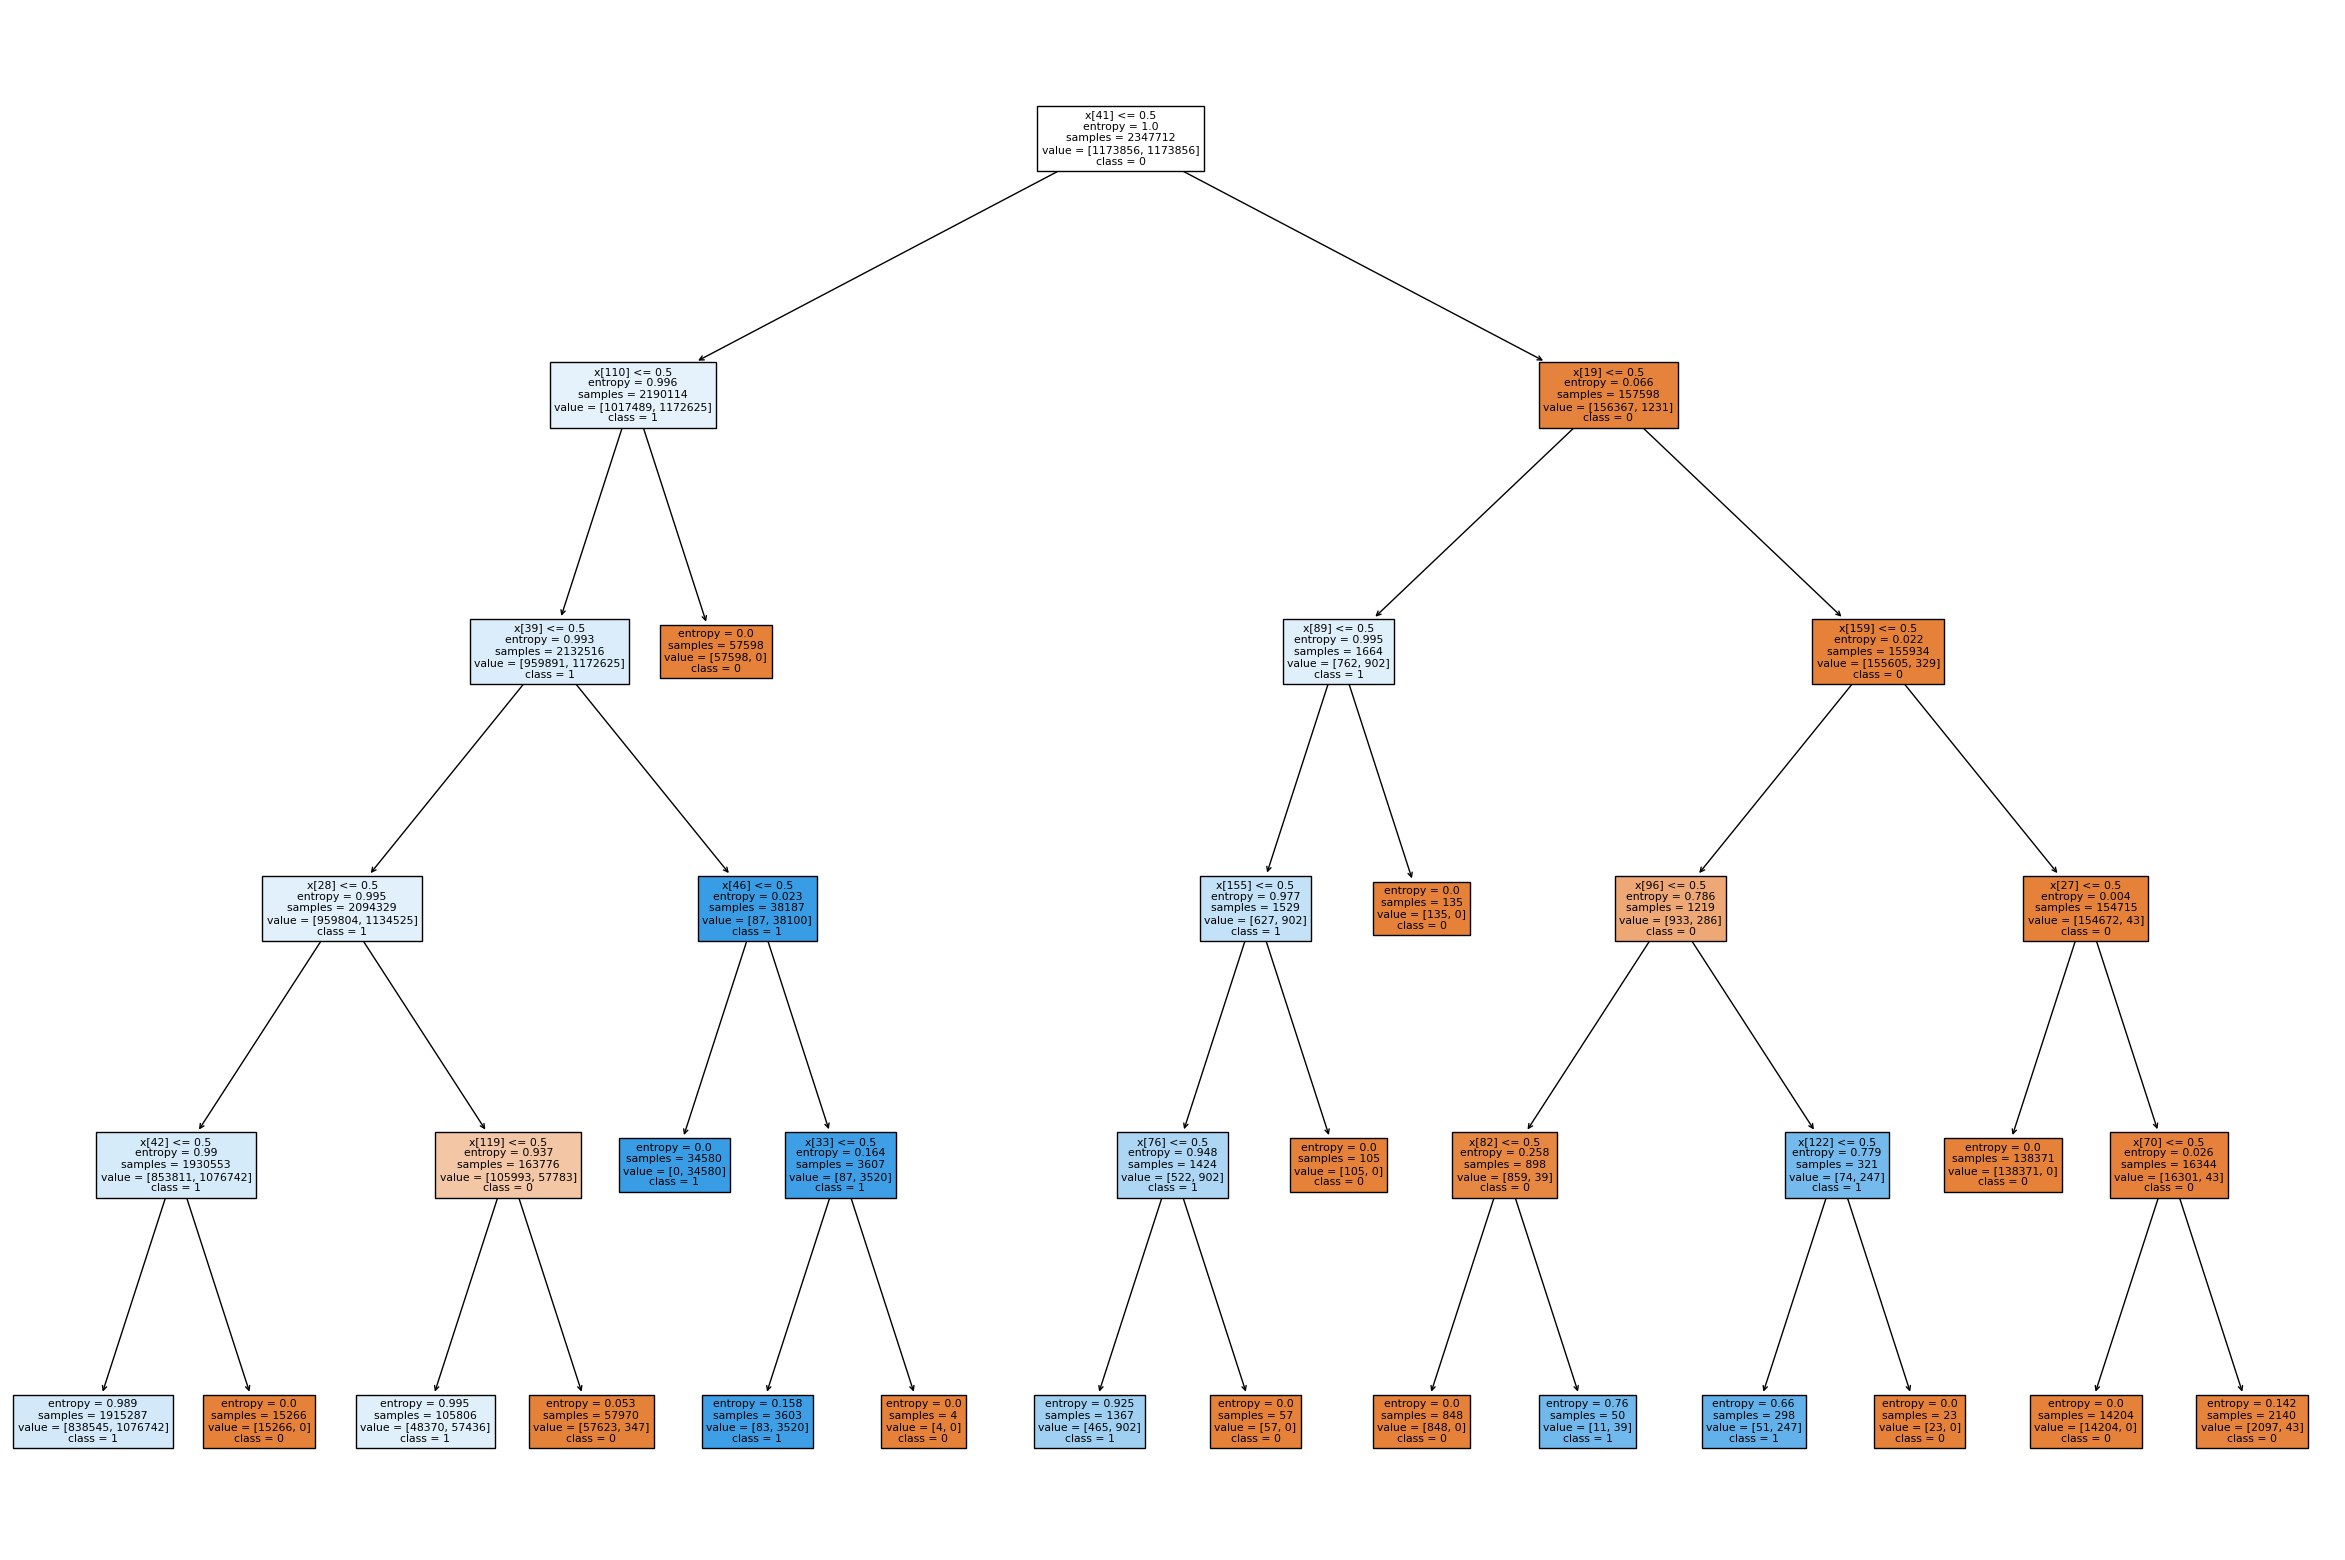

In [ ]:
# Crear un modelo de árbol de decisión
clf = DecisionTreeClassifier(max_depth=5, random_state=42, class_weight="balanced", criterion='entropy')

# Entrenar el modelo con los datos de entrenamiento
clf.fit(x_tr_resample,y_tr_resample)

# Predecir las etiquetas para los datos de prueba
preds = clf.predict(X_test)

# Evaluar el modelo
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

# Visualizar árbol de decisión
plt.figure(figsize=(30,20))
plot_tree(clf, class_names=['0','1'], filled=True)

# Guardar la figura como imagen JPEG de alta resolución
plt.savefig('arbol_decisionJP_5depth.jpg', dpi=300, bbox_inches='tight')

# Mostrar la figura
plt.show()

In [ ]:
# Let's assume X_train is the data you used for training your model
feature_names = X_train.columns
feature_importances = clf.feature_importances_

importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

print(importances_df.sort_values(by='Importance', ascending=False).head(10))

                                 Feature  Importance
41                     USD_amount_NORMAL    0.452094
110               Max_USD_Sent_MUCHISIMO    0.189405
119                     Max_USD_Rec_POCO    0.131362
39                   USD_amount_MUY ALTA    0.094679
28                   Bene_Country_CANADA    0.053835
42                       USD_amount_POCO    0.052683
19                  Bene_Id_BILL-COMPANY    0.015538
159  Bene_Transactions_Last_30_Days_CERO    0.005450
96                    average_USD_rec_10    0.001389
46        Transaction_Type_DEPOSIT-CHECK    0.000867


In [ ]:
# Initiate a StratifiedKFold object
skf = StratifiedKFold(n_splits=10) # you can adjust the number of splits

# Lists to save metrics after each fold
aucs = []
recalls = []
f1s = []  # renamed variable
accuracies = []  # renamed variable
# Initialize lists to save precision, recall, fscore for each class over the folds
precision0, recall0, fscore0, support0 = [], [], [], []
precision1, recall1, fscore1, support1 = [], [], [], []


# In each iteration, the algorithm will train on the training folds and evaluate on the validation fold
for train_index, val_index in skf.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # As your training set is balanced after using SMOTE, do that here
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

    # Crear un modelo de árbol de decisión
    clf = DecisionTreeClassifier(max_depth=5, random_state=42, class_weight="balanced", criterion='entropy')

    # Entrenar el modelo con los datos de entrenamiento
    clf.fit(X_train_smote,y_train_smote)

    # Get predictions for the validation fold
    preds = nbayes.predict(X_val)

    # Calculate metrics for this fold
    roc_auc = roc_auc_score(y_val, preds)
    recall = recall_score(y_val, preds)
    f1 = f1_score(y_val, preds)  # renamed variable
    accuracy = accuracy_score(y_val, preds)  # renamed variable

    # Save metrics for this fold
    aucs.append(roc_auc)
    recalls.append(recall)
    f1s.append(f1)  # renamed variable
    accuracies.append(accuracy)  # renamed variable

    # Compute precision, recall, f-score, support for each class
    prfs = precision_recall_fscore_support(y_val, preds)
        # Append the scores to the lists
    precision0.append(prfs[0][0])
    recall0.append(prfs[1][0])
    fscore0.append(prfs[2][0])
    support0.append(prfs[3][0])

    precision1.append(prfs[0][1])
    recall1.append(prfs[1][1])
    fscore1.append(prfs[2][1])
    support1.append(prfs[3][1])

# Calculate average metrics over all folds
avg_auc = mean(aucs)
avg_recall = mean(recalls)
avg_f1 = mean(f1s)  # renamed variable
avg_accuracy = mean(accuracies)  # renamed variable

print(f'Average AUC: {avg_auc}')
print(f'Average Recall: {avg_recall}')
print(f'Average F1-score: {avg_f1}')
print(f'Average Accuracy: {avg_accuracy}')

print("------------------------------------CLASES-SEPARADAS---------------------------------------------------------")
# Calculate and print averages over all folds for each class
print(f'Average precision for Class 0: {np.mean(precision0)}')
print(f'Average recall for Class 0: {np.mean(recall0)}')
print(f'Average F1-score for Class 0: {np.mean(fscore0)}')
print(f'Average support for Class 0: {np.mean(support0)}')

print(f'Average precision for Class 1: {np.mean(precision1)}')
print(f'Average recall for Class 1: {np.mean(recall1)}')
print(f'Average F1-score for Class 1: {np.mean(fscore1)}')
print(f'Average support for Class 1: {np.mean(support1)}')

XGBoost

In [ ]:


eval_set = [(x_val, y_val)]

# Ajustar el modelo con early stopping
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', eval_metric='error', n_estimators=500)
xgb_clf.fit(x_tr, y_tr, early_stopping_rounds=10, eval_set=eval_set, verbose=True)

# Obtener los errores de validación
validation_errors = xgb_clf.evals_result()['validation_0']['error']

# Generar la gráfica del error
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, len(validation_errors) + 1), validation_errors, marker='o')
plt.title('Error vs Iteration')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.grid()
plt.savefig('error_vs_iteration.png')
plt.show()


In [ ]:
preds = xgb_clf.predict(X_test)
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

In [101]:
# Define the parameters for the search
parameters = {
       'max_depth': [3,6,9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.2,0.5,0.8],
    'n_estimators': [100,300,500],
}

results = []

# Create a list of all possible combinations of parameters
parameter_combinations = list(ParameterGrid(parameters))

# Iterate over each parameter combination
for params in parameter_combinations:

    # Set up the XGB classifier with the current parameters
    xgb_clf = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc', **params)

    # Train the XGB classifier
    xgb_clf.fit(x_tr_resample, y_tr_resample)

    # Predict with the model
    preds = xgb_clf.predict(X_test)

    # Get the classification report
    report = classification_report(y_test, preds, output_dict=True)

    # Flatten the classification report
    flat_report = {}
    for k, v in report.items():
        if isinstance(v, dict):
            for subk, subv in v.items():
                flat_report[f"{k}_{subk}"] = subv
        else:
            flat_report[k] = v

    # Save the results
    result = {
        'parameters': params,
        **flat_report,
    }
    results.append(result)

    # Print the results
    print(f"Parameters: {params}, Accuracy: {result['accuracy']}, Macro Avg Precision: {result['macro avg_precision']}, Macro Avg Recall: {result['macro avg_recall']}, Macro Avg F1-score: {result['macro avg_f1-score']}", report)

# Convert the results to a DataFrame
df_results = pd.DataFrame(results)

# Save the results to a CSV file
df_results.to_csv('xgboost_JP_log_auc.csv', index=False)


Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.2}, Accuracy: 0.281833321652299, Macro Avg Precision: 0.5116500661298276, Macro Avg Recall: 0.6116693808519884, Macro Avg F1-score: 0.23701506440520637 {'False': {'precision': 0.9965231514966945, 'recall': 0.2676251686863592, 'f1-score': 0.42193573690869873, 'support': 293444}, 'True': {'precision': 0.026776980762960548, 'recall': 0.9557135930176176, 'f1-score': 0.05209439190171402, 'support': 6187}, 'accuracy': 0.281833321652299, 'macro avg': {'precision': 0.5116500661298276, 'recall': 0.6116693808519884, 'f1-score': 0.23701506440520637, 'support': 299631}, 'weighted avg': {'precision': 0.9764991234143877, 'recall': 0.281833321652299, 'f1-score': 0.414298982362079, 'support': 299631}}
Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}, Accuracy: 0.28183665909068156, Macro Avg Precision: 0.5116501488187728, Macro Avg Recall: 0.611671084754607, Macro Avg F1-sco

In [ ]:
# Define the parameters for the search
parameters = {
       'max_depth': [3,6,9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.2,0.5,0.8],
    'n_estimators': [100,300,500],
}

results = []

# Create a list of all possible combinations of parameters
parameter_combinations = list(ParameterGrid(parameters))

# Iterate over each parameter combination
for params in parameter_combinations:

    # Set up the XGB classifier with the current parameters
    xgb_clf = xgb.XGBClassifier(objective='binary:logistic', eval_metric='aucpr', **params)

    # Train the XGB classifier
    xgb_clf.fit(x_tr_resample, y_tr_resample)

    # Predict with the model
    preds = xgb_clf.predict(X_test)

    # Get the classification report
    report = classification_report(y_test, preds, output_dict=True)

    # Flatten the classification report
    flat_report = {}
    for k, v in report.items():
        if isinstance(v, dict):
            for subk, subv in v.items():
                flat_report[f"{k}_{subk}"] = subv
        else:
            flat_report[k] = v

    # Save the results
    result = {
        'parameters': params,
        **flat_report,
    }
    results.append(result)

    # Print the results
    print(f"Parameters: {params}, Accuracy: {result['accuracy']}, Macro Avg Precision: {result['macro avg_precision']}, Macro Avg Recall: {result['macro avg_recall']}, Macro Avg F1-score: {result['macro avg_f1-score']}", report)

# Convert the results to a DataFrame
df_results = pd.DataFrame(results)

# Save the results to a CSV file
df_results.to_csv('xgboost_JP_log_auc.csv', index=False)

In [99]:

parameters = {
    'max_depth': [3,6,9],
    'learning_rate': [0.01, 0.1, 0.02],
    'subsample': [0.2,0.5,0.8],
    'n_estimators': [100,300,500],
}

results = []




    # Set up the XGB classifier with the current parameters
xgb_clf = xgb.XGBClassifier(objective='binary:hinge', eval_metric='aucpr',**params)

    # Train the XGB classifier
xgb_clf.fit(x_tr_resample, y_tr_resample)

    # Predict with the model
preds = xgb_clf.predict(X_test)

    # Get the classification report
report = classification_report(y_test, preds, output_dict=True)

print(classification_report)
print(confusion_matrix(y_test, preds)) 
 


<function classification_report at 0x0000021DB4E27AF0>
[[143864 149580]
 [   866   5321]]


In [100]:
print(report)

{'False': {'precision': 0.9940164444137359, 'recall': 0.4902604926323251, 'f1-score': 0.6566523801047072, 'support': 293444}, 'True': {'precision': 0.03435097255666523, 'recall': 0.8600290932600614, 'f1-score': 0.06606326976559397, 'support': 6187}, 'accuracy': 0.4978957450998061, 'macro avg': {'precision': 0.5141837084852006, 'recall': 0.6751447929461932, 'f1-score': 0.36135782493515056, 'support': 299631}, 'weighted avg': {'precision': 0.9742005699735755, 'recall': 0.4978957450998061, 'f1-score': 0.6444574642726735, 'support': 299631}}


In [ ]:
kf = KFold(n_splits=4)
roc_auc_scores = []
classification_reports = []
confusion_matrices = []
aucs = []
recalls = []
f1_scores = []
accuracy_scores = []

for train_index, test_index in kf.split(x_tr_resample, y_tr_resample):
    X_train, X_valid = x_tr_resample.iloc[train_index], x_tr_resample.iloc[test_index]
    y_train, y_valid = y_tr_resample.iloc[train_index], y_tr_resample.iloc[test_index]
    
    xgb_rf_model = xgb.XGBRFClassifier(random_state=42)
    xgb_rf_model.fit(X_train, y_train)
    
    preds = xgb_rf_model.predict(X_valid) 
    # Calculate metrics for this fold
    roc_auc = roc_auc_score(y_valid, preds)
    recall = recall_score(y_valid, preds)
    f1 = f1_score(y_valid, preds)
    accuracy = accuracy_score(y_valid, preds)
    # Calculate the ROC AUC score, classification report and confusion matrix for each fold
    roc_auc_scores.append(roc_auc_score(y_valid, preds))
    classification_reports.append(classification_report(y_valid, preds))
    confusion_matrices.append(confusion_matrix(y_valid, preds))

# Print the average ROC AUC score, classification report and confusion matrix across all folds
print('Average ROC AUC score:', np.mean(roc_auc_scores))
for i in range(kf.get_n_splits()):
    print(f'\nFold {i+1} classification report:\n', classification_reports[i])
    print(f'\nFold {i+1} confusion matrix:\n', confusion_matrices[i])
print(f'Average AUC: {avg_auc}')
print(f'Average Recall: {avg_recall}')
print(f'Average F1-score: {avg_f1_score}')
print(f'Average Accuracy: {avg_accuracy_score}')

In [ ]:

# Define and train the model
xgb_rf_model = xgb.XGBRFClassifier(random_state=42)
xgb_rf_model.fit(x_tr_resample, y_tr_resample)

# Make predictions
preds = xgb_rf_model.predict(X_test)

# Calculate the ROC AUC score, classification report and confusion matrix
roc_auc_score = roc_auc_score(y_test, preds)
classification_report = classification_report(y_test, preds)
confusion_matrix = confusion_matrix(y_test, preds)

# Print the results
print('ROC AUC score:', roc_auc_score)
print('Classification report:\n', classification_report)
print('Confusion matrix:\n', confusion_matrix)

In [ ]:

xgb_res=xgb.XGBClassifier(objective='binary:hinge', eval_metric='auc',learning_rate= 0.12, max_depth= 6, n_estimators= 500, subsample= 0.8)
xgb_res.fit(x_tr_resample, y_tr_resample)

# Make predictions
preds = xgb_res.predict(X_test)

# Calculate the ROC AUC score, classification report and confusion matrix
roc_auc_score = roc_auc_score(y_test, preds)
classification_report = classification_report(y_test, preds)
confusion_matrix = confusion_matrix(y_test, preds)

# Print the results
print('ROC AUC score:', roc_auc_score)
print('Classification report:\n', classification_report)
print('Confusion matrix:\n', confusion_matrix)

In [ ]:
from sklearn.model_selection import ParameterGrid
# Define the parameters for the search
parameters = {
    'max_depth': [3,6],
    'learning_rate': [0.05,0.1,0.2],
    'subsample': [0.2,0.5,0.8],
    'n_estimators': [300,500],
}

results = []
eval_set = [(X_test, y_test)]
# Create a list of all possible combinations of parameters
parameter_combinations = list(ParameterGrid(parameters))

# Iterate over each parameter combination
for params in parameter_combinations:

    # Set up the XGB classifier with the current parameters
    xgb_clf = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc', **params)

    # Train the XGB classifier
    xgb_clf.fit(x_tr_resample, y_tr_resample, early_stopping_rounds=12, eval_set=eval_set)

    # Predict with the model
    preds = xgb_clf.predict(X_test)

    # Get the classification report
    report = classification_report(y_test, preds, output_dict=True)

    # Flatten the classification report
    flat_report = {}
    for k, v in report.items():
        if isinstance(v, dict):
            for subk, subv in v.items():
                flat_report[f"{k}_{subk}"] = subv
        else:
            flat_report[k] = v

    # Save the results
    result = {
        'parameters': params,
        **flat_report,
    }
    results.append(result)

    # Print the results
    print(f"Parameters: {params}, Accuracy: {result['accuracy']}, Macro Avg Precision: {result['macro avg_precision']}, Macro Avg Recall: {result['macro avg_recall']}, Macro Avg F1-score: {result['macro avg_f1-score']}", report)

# Convert the results to a DataFrame
df_results = pd.DataFrame(results)

# Save the results to a CSV file
df_results.to_csv('xgb_results_resample_log_aucpr.csv', index=False)

In [ ]:
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
import numpy as np

# Make probability predictions
pred_proba = xgb_rf_model.predict_proba(X_test)

# Change the threshold
threshold = 0.45
preds = np.where(pred_proba[:,1] > threshold, 1, 0)

# Calculate the ROC AUC score, classification report and confusion matrix
roc_score = roc_auc_score(y_test, preds)
class_report = classification_report(y_test, preds)
conf_matrix = confusion_matrix(y_test, preds)

# Print the results
print('ROC AUC score:', roc_score)
print('Classification report:\n', class_report)
print('Confusion matrix:\n', conf_matrix)


In [ ]:
import xgboost as xgb
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

# Define the base models
level0 = list()

xgb_clf = xgb.XGBClassifier(objective='binary:logistic', eval_metric='error', n_estimators=500)
level0.append(('xgb', xgb_clf))

xgb_rf_model = xgb.XGBRFClassifier(random_state=42)
level0.append(('xgbrf', xgb_rf_model))

# Define meta learner model
level1 = xgb.XGBClassifier(objective='binary:logistic', eval_metric='error', n_estimators=500)

# Define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)

# Fit the model on all available data
model.fit(x_tr_resample, y_tr_resample)

# Make predictions
preds = model.predict(X_test)


# Calculate the ROC AUC score, classification report and confusion matrix
roc_auc_score_value = roc_auc_score(y_test, preds)
classification_report_value = classification_report(y_test, preds)
confusion_matrix_value = confusion_matrix(y_test, preds)

# Print the results
print('ROC AUC score:', roc_auc_score_value)
print('Classification report:\n', classification_report_value)
print('Confusion matrix:\n', confusion_matrix_value)


In [ ]:
import xgboost as xgb
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

# Define the base models
level0 = list()

xgbclas= xgb.XGBClassifier(objective='binary:hinge', eval_metric='auc',learning_rate= 0.12, max_depth= 6, n_estimators= 500, subsample= 0.8)
level0.append(('xgbclas', xgbclas))
nbayes = GaussianNB()
level0.append(('nbayes', nbayes))

# Define meta learner model
level1 = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc',learning_rate= 0.2, max_depth= 6, n_estimators= 500, subsample= 0.5)

# Define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)

# Fit the model on all available data
model.fit(x_tr_resample, y_tr_resample)

# Make predictions
preds = model.predict(X_test)


# Calculate the ROC AUC score, classification report and confusion matrix
roc_auc_score_value = roc_auc_score(y_test, preds)
classification_report_value = classification_report(y_test, preds)
confusion_matrix_value = confusion_matrix(y_test, preds)

# Print the results
print('ROC AUC score:', roc_auc_score_value)
print('Classification report:\n', classification_report_value)
print('Confusion matrix:\n', confusion_matrix_value)


VOTING METHOD

In [ ]:
from sklearn.ensemble import VotingClassifier
# define the base models
model1 = xgb_clf = xgb.XGBClassifier(objective='binary:hinge', eval_metric='auc',learning_rate= 0.12, max_depth= 6, n_estimators= 600, subsample= 0.8)
model2 = nbayes = GaussianNB()
model3=LR=LogisticRegression()
# define the voting ensemble
model = VotingClassifier(estimators=[('xgbc', model1), ('Nbayes', model2)])

# fit model
model.fit(x_tr_resample, y_tr_resample)

# make predictions
y_pred = model.predict(X_test)
#get confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

REDES NEURONALES

In [ ]:
from sklearn.model_selection import train_test_split

# Definir los atributos y la variable objetivo
y = df['Label_1.0']
X = df.drop('Label_1.0', axis=1)
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dividir el conjunto de entrenamiento en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2


In [ ]:
X_train.columns

Index(['Sender_Id_BILL-COMPANY', 'Sender_Id_CLIENT', 'Sender_Id_COMPANY',
       'Sender_Id_JPMC-CLIENT', 'Sender_Id_JPMC-COMPANY', 'Sender_Country_AF',
       'Sender_Country_AN', 'Sender_Country_AS', 'Sender_Country_CANADA',
       'Sender_Country_Desconocido',
       ...
       'Bene_Transactions_Last_1_Days_POCO',
       'Bene_Transactions_Last_7_Days_CERO',
       'Bene_Transactions_Last_7_Days_MEDIO',
       'Bene_Transactions_Last_7_Days_MUCHO',
       'Bene_Transactions_Last_7_Days_POCO',
       'Bene_Transactions_Last_30_Days_CERO',
       'Bene_Transactions_Last_30_Days_MEDIO',
       'Bene_Transactions_Last_30_Days_MUCHO',
       'Bene_Transactions_Last_30_Days_POCO',
       'Bene_Transactions_Last_30_Days_nan'],
      dtype='object', length=139)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.metrics import Precision, Recall

# Establecer el número de características
n_features = X_train.shape[1]

# Construir el modelo
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(n_features,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall()])


In [ ]:
from keras.callbacks import EarlyStopping
# Define un callback de early stopping para detener el entrenamiento cuando el 'val_loss' ya no mejore
early_stopping = EarlyStopping(monitor='recall', patience=10)
# Entrenar el modelo
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=400, batch_size=32,callbacks=[early_stopping])

# Evaluar el modelo en el conjunto de prueba
scores = model.evaluate(X_test, y_test)
accuracy, precision, recall = scores[1], scores[2], scores[3]
f1_score = 2 * (precision * recall) / (precision + recall)

# Preparar los datos para guardar
data_to_save = {
    'model_config': [model.to_json()],
    'test_accuracy': [accuracy],
    'test_precision': [precision],
    'test_recall': [recall],
    'test_f1_score': [f1_score]
}

# Convertir a DataFrame y guardar en CSV
results_df = pd.DataFrame(data_to_save)
results_df.to_csv('model_results.csv', mode='a', index=False)


Epoch 1/400
19939/19939 [==============================] - 68s 3ms/step - loss: 0.0776 - accuracy: 0.9827 - precision: 0.9544 - recall: 0.1464 - val_loss: 0.0820 - val_accuracy: 0.9821 - val_precision: 0.9653 - val_recall: 0.1392
Epoch 2/400
19939/19939 [==============================] - 61s 3ms/step - loss: 0.0774 - accuracy: 0.9826 - precision: 0.9537 - recall: 0.1459 - val_loss: 0.0816 - val_accuracy: 0.9821 - val_precision: 0.9414 - val_recall: 0.1426
Epoch 3/400
19939/19939 [==============================] - 64s 3ms/step - loss: 0.0772 - accuracy: 0.9827 - precision: 0.9571 - recall: 0.1457 - val_loss: 0.0815 - val_accuracy: 0.9821 - val_precision: 0.9230 - val_recall: 0.1444
Epoch 4/400
19939/19939 [==============================] - 53s 3ms/step - loss: 0.0771 - accuracy: 0.9827 - precision: 0.9507 - recall: 0.1471 - val_loss: 0.0818 - val_accuracy: 0.9821 - val_precision: 0.9267 - val_recall: 0.1438
Epoch 5/400
19939/19939 [==============================] - 51s 3ms/step - loss: 

In [ ]:
# Construir el modelo
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(n_features,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
learning_rate = 0.01  # O cualquier otro valor que desees probar
optimizer = Adam(lr=learning_rate)
# Compilar el modelo
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall()])

c:\Users\docam\AppData\Local\Programs\Python\Python39\lib\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
from keras.callbacks import EarlyStopping
# Define un callback de early stopping para detener el entrenamiento cuando el 'val_loss' ya no mejore
early_stopping = EarlyStopping(monitor='recall', patience=15)
# Entrenar el modelo
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=400, batch_size=32,callbacks=[early_stopping])

# Evaluar el modelo en el conjunto de prueba
scores = model.evaluate(X_test, y_test)
accuracy, precision, recall = scores[1], scores[2], scores[3]
f1_score = 2 * (precision * recall) / (precision + recall)

# Preparar los datos para guardar
data_to_save = {
    'model_config': [model.to_json()],
    'test_accuracy': [accuracy],
    'test_precision': [precision],
    'test_recall': [recall],
    'test_f1_score': [f1_score]
}

# Convertir a DataFrame y guardar en CSV
results_df = pd.DataFrame(data_to_save)
results_df.to_csv('model_results.csv', mode='a', index=False)

Epoch 1/400
19939/19939 [==============================] - 36s 2ms/step - loss: 0.0822 - accuracy: 0.9821 - precision_1: 0.9089 - recall_1: 0.1250 - val_loss: 0.0838 - val_accuracy: 0.9820 - val_precision_1: 0.9313 - val_recall_1: 0.1388
Epoch 2/400
19939/19939 [==============================] - 35s 2ms/step - loss: 0.0814 - accuracy: 0.9824 - precision_1: 0.9197 - recall_1: 0.1399 - val_loss: 0.0839 - val_accuracy: 0.9820 - val_precision_1: 0.9103 - val_recall_1: 0.1408
Epoch 3/400
19939/19939 [==============================] - 35s 2ms/step - loss: 0.0820 - accuracy: 0.9824 - precision_1: 0.9266 - recall_1: 0.1385 - val_loss: 0.0828 - val_accuracy: 0.9820 - val_precision_1: 0.9661 - val_recall_1: 0.1363
Epoch 4/400
19939/19939 [==============================] - 35s 2ms/step - loss: 0.0812 - accuracy: 0.9825 - precision_1: 0.9367 - recall_1: 0.1404 - val_loss: 0.0848 - val_accuracy: 0.9818 - val_precision_1: 0.8409 - val_recall_1: 0.1479
Epoch 5/400
19939/19939 [=======================

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import tensorflow_addons as tfa
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Definir el modelo
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Only one neuron for binary classification

# Define the optimizer
optimizer = Adam(learning_rate=0.01)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=[tfa.metrics.F1Score(num_classes=1, average="macro", threshold=0.5)])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_f1_score', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=400, batch_size=32, callbacks=[early_stopping])

# Predictions
y_pred = model.predict(X_test)

# Convert probabilities into binary outputs
y_pred = [1 if prob >= 0.5 else 0 for prob in y_pred]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)

# Prepare data to save
data_to_save = {
    'model_config': [model.to_json()],
    'test_accuracy': [accuracy],
    'test_precision': [precision],
    'test_recall': [recall],
    'test_f1_score': [f1_score]
}

# Convert to DataFrame and save to CSV
results_df = pd.DataFrame(data_to_save)
results_df.to_csv('model_results.csv', mode='a', index=False)


Epoch 1/400
19939/19939 [==============================] - 43s 2ms/step - loss: 0.0831 - f1_score: 0.2175 - val_loss: 0.0841 - val_f1_score: 0.2319
Epoch 2/400
19939/19939 [==============================] - 63s 3ms/step - loss: 0.0818 - f1_score: 0.2377 - val_loss: 0.0849 - val_f1_score: 0.2350
Epoch 3/400
19939/19939 [==============================] - 82s 4ms/step - loss: 0.0817 - f1_score: 0.2414 - val_loss: 0.0837 - val_f1_score: 0.2085
Epoch 4/400
19939/19939 [==============================] - 50s 3ms/step - loss: 0.0818 - f1_score: 0.2440 - val_loss: 0.0851 - val_f1_score: 0.2365
Epoch 5/400
19939/19939 [==============================] - 76s 4ms/step - loss: 0.0821 - f1_score: 0.2435 - val_loss: 0.0859 - val_f1_score: 0.2444
Epoch 6/400
19939/19939 [==============================] - 79s 4ms/step - loss: 0.0817 - f1_score: 0.2438 - val_loss: 0.0852 - val_f1_score: 0.2487
Epoch 7/400
19939/19939 [==============================] - 83s 4ms/step - loss: 0.0814 - f1_score: 0.2437 - val_